# Preliminaries

A probability is a measurement of a possibility (relative to a range of possibilities). Probability theory is a way of formalizing this idea. The most common such formalization–the [Kolmogorov axioms](https://en.wikipedia.org/wiki/Probability_axioms)–can be thought of as defining: (i) what it means to be a possibility; and (ii) what it means to measure a possibility.

What it means for a quantity to be a probability is a surprisingly contentious topic. It's an interesting topic–and I encourage you to read about [the various possibilities](https://plato.stanford.edu/entries/probability-interpret/)–but for the purposes of this course, we will tend to think of probabilities as a quantification of a degree of belief–e.g. how strongly ones believe that some speaker uttered a high vowel v. a non-high vowel.  This interpretation is sometimes referred to as the subjective or Bayesian interpretation. We'll flesh this idea out as we move through the course.

## What it means to be a possibility

The Kolmogorov axioms start by specifying a set $\Omega$ that contains all and only the things that can possibly happen. This set is known as the *sample space*. So what it means to be a possibility is a brute fact: it's all and only the things in $\Omega$.

That's very abstract, so let's consider a few examples relevant to this class:

1. In Module 1, we'll consider a case where $\Omega$ is the set of all vowel types in a language–e.g. for English $\Omega = \{\text{e, i, o, u, æ, ɑ, ɔ, ə, ɛ, ɪ, ʊ}\}$.
2. Also in Module 1, we'll consider a case where $\Omega$ is the set of all pairs of first and second formant values. I'll briefly review what a formant is in a few weeks; but in this case, we'll assume that $\Omega$ is just all pairs of possitive real numbers $\mathbb{R}_+^2$. (If you've taken a phonetics course, you know that this definition overgenerates possibilities, since the values that the first and second formats can take on are constrained by the structure of the human vocal tract; but it's going to turn out to not be too much of a problem, as we'll see in Module 1.)
3. In Modules 2 and 3, we'll consider a case where $\Omega$ is the set of all strings of phonemes in a language–e.g. if $\Sigma$ is the set of phonemes, then $\Omega = \Sigma^* = \bigcup_{i=0}^\infty \Sigma^i$.
4. In Module 3, we'll consider a case where $\Omega$ is the set of all strings of morphemes in a language–e.g. if $\Sigma$ is the set of morphemes, then $\Omega = \Sigma^* = \bigcup_{i=0}^\infty \Sigma^i$.
5. In Module 4, we'll consider a case where $\Omega$ is the set of all context free grammar derivations–e.g. if $G = \langle \Sigma, V, R, S \rangle$ (with $R \subseteq V \times (V \cup \Sigma \cup \{\epsilon\})^+$) is a context free grammar, then $\Omega = \bigcup_{s \in L_G} P_G(s)$, where $L_G$ is the language generatd by $G$ and $P_G$ is a parser for $G$.

The axioms then move forward by defining a way of classifying possibilities $\mathcal{F} \subseteq 2^\Omega$. These classes of possibilities are known as *events* and the set of said classes is known as the *event space*. It is events, which can contain just a single possibility, that we measure the probability of. (Don't ask me why, but $\mathcal{F}$ is standard notation for the event space. Why we don't use $\mathcal{E}$ is beyond me. It might be some convention from measure theory I'm not aware of; or it might have to do with not confusing the event space with the expectation $\mathbb{E}$, which we'll review below.)

The event space is where interesting linguistic structure enters the picture. Let's look at a few examples of event spaces that assume our first example of a sample space above: $\Omega = \{\text{e, i, o, u, æ, ɑ, ɔ, ə, ɛ, ɪ, ʊ}\}$.

1. One possible event space distinguishes vowels with respect to highness: $\mathcal{F}_\text{highness} = \{H, L, \Omega, \emptyset\}$, with $H = \{\text{i, u, ɪ, ʊ}\}$ and $L = \Omega - H$.
2. Another possible event space distinguishes vowels with respect to backness: $\mathcal{F}_\text{backness} = \{B, F, \Omega, \emptyset\}$, with $B = \{\text{u, ʊ, o, ɔ}\}$ and $F = \Omega - B$.



In [ ]:
emptyset = frozenset()
vowels = frozenset({'e', 'i', 'o', 'u', 'æ', 'ɑ', 'ɔ', 'ə', 'ɛ', 'ɪ', 'ʊ'})

# high v. nonhigh
high = frozenset({'i', 'u', 'ɪ', 'ʊ'})
nonhigh = vowels - high

f_highness = frozenset({
    frozenset(emptyset),
    frozenset(high), frozenset(nonhigh),
    frozenset(vowels)
})

# back v. nonback
back = frozenset({'u', 'ʊ', 'o', 'ɔ'})
nonback = vowels - back

f_backness = frozenset({
    frozenset(emptyset),
    frozenset(back), frozenset(nonback),
    frozenset(vowels)
})



You'll notice that beyond having just the set of high v. non-high vowels, or the set of back v. non-back vowels in these event spaces, we also have the entire set of vowels itself alongside the empty set. The reasons for this are technical: to make certain aspects of the formalization of what it means to measure probabilties work out nicely, we need the event space $\mathcal{F}$ to form what is known as a [$\sigma$-algebra](https://en.wikipedia.org/wiki/%CE%A3-algebra) on the sample space $\Omega$. All this means is that:

1. $\mathcal{F} \subseteq 2^\Omega$
2. $E \in \mathcal{F}$ iff $\Omega - E \in \mathcal{F}$ (*closure under complement*)
3. $\bigcup \mathcal{E} \in \mathcal{F}$ for all countable $\mathcal{E} \subseteq \mathcal{F}$ (*closure under countable union*)
4. $\bigcap \mathcal{E} \in \mathcal{F}$ for all countable $\mathcal{E} \subseteq \mathcal{F}$ (*closure under countable intersection*)


In [ ]:
from typing import Set, FrozenSet, Iterable
from itertools import chain, combinations
from functools import reduce

SampleSpace = FrozenSet[str]
Event = FrozenSet[str]
SigmaAlgebra = FrozenSet[Event]

def powerset(iterable: Iterable) -> Iterable:
    """The power set of a set

    See https://docs.python.org/3/library/itertools.html#itertools-recipes

    Parameters
    ----------
    iterable
      The set to take the power set of
    """
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

class FiniteMeasurableSpace:
  """A finite measurable space

  Parameters
  ----------
  atoms
    The atoms of the space
  sigma_algebra
    The σ-algebra of the space
  """
  def __init__(self, atoms: SampleSpace, sigma_algebra: SigmaAlgebra):
    self._atoms = atoms
    self._sigma_algebra = sigma_algebra

    self._validate()

  def _validate(self):
    for subset in self._sigma_algebra:
      # check powerset condition
      if not subset <= self._atoms:
        raise ValueError("All events must be a subset of the atoms")

      # check closure under complement
      if not (self._atoms - subset) in self._sigma_algebra:
        raise ValueError("The σ-algebra must be closed under complements")

    for subsets in powerset(self._sigma_algebra):
      subsets = list(subsets)

      # python doesn't like to reduce empty iterables
      if not subsets:
        continue

      # check closure under finite union
      union = frozenset(reduce(frozenset.union, subsets))
      if union not in self._sigma_algebra:
        raise ValueError(
            "The σ-algebra must be closed under countable union"
        )

      # check closure under finite intersection
      intersection = frozenset(reduce(frozenset.intersection, subsets))
      if intersection not in self._sigma_algebra:
        raise ValueError(
            "The σ-algebra must be closed under countable intersection"
        )

  @property
  def atoms(self) -> SampleSpace:
    return self._atoms

  @property
  def sigma_algebra(self) -> SigmaAlgebra:
    return self._sigma_algebra


You can check that all of these conditions are satisfied for our two examples above as long as $\Omega$ and $\emptyset$ are both in $\mathcal{F}$. When $\mathcal{F} \subseteq 2^\Omega$ is a $\sigma$-algebra, the pair $\langle \Omega, \mathcal{F} \rangle$ is referred to as a [measurable space](https://en.wikipedia.org/wiki/Measurable_space).



In [ ]:
highness_space = FiniteMeasurableSpace(vowels, f_highness)
backness_space = FiniteMeasurableSpace(vowels, f_backness)

The two examples above are close to trivial in the sense that the only "interesting" events are complements of each other. But what if we put both together, distinguishing vowels with respect to both highness and backness? Both have the same sample space, so nothing needs to change there.

*Question:* Can we simply define $\mathcal{F}_\text{highness-backness} = \mathcal{F}_\text{highness} \cup \mathcal{F}_\text{backness}$?

*Answer*: No. While Condition 1 above would be satisfied (that's easy), we would be missing quite a few sets that Conditions 2-4 require: e.g. the high back vowels $H \cap B$ and the high and/or back vowels $H \cup B$.

In [ ]:
try:
  highness_space = FiniteMeasurableSpace(vowels, f_highness.union(f_backness))
except ValueError as e:
  print(f"ValueError: {e}")

ValueError: The σ-algebra must be closed under countable union


This point demonstrates an important fact about $\sigma$-algebras: if you design a classification based on some (countable) set of features like highness and backness, the constraint that $\mathcal{F}$ be a $\sigma$-algebra on $\Omega$ implies that $\mathcal{F}$ contains events corresponding to all possible conjunctions (e.g. high and back) and disjunctions (e.g. high and/or back) of those features. So we need to extend $\mathcal{F}_\text{highness} \cup \mathcal{F}_\text{backness}$ with additional sets. We call this extension the $\sigma$-algebra *generated by the family of sets* $\mathcal{F}_\text{highness} \cup \mathcal{F}_\text{backness}$, denoted $\sigma\left(\mathcal{F}_\text{highness} \cup \mathcal{F}_\text{backness}\right)$.

In [ ]:
def generate_sigma_algebra(family: SigmaAlgebra) -> SigmaAlgebra:
  """Generate a σ-algebra from a family of sets

  Parameters
  ----------
  family
    The family of sets from which to generate the σ-algebra
  """

  sigma_algebra = set(family)
  old_sigma_algebra = set(family)

  complete = False

  while not complete:
    for subsets in powerset(old_sigma_algebra):
      subsets = list(subsets)

      if not subsets:
        continue

      union = reduce(frozenset.union, subsets)
      sigma_algebra.add(union)

      intersection = reduce(frozenset.intersection, subsets)
      sigma_algebra.add(intersection)

    complete = sigma_algebra == old_sigma_algebra
    old_sigma_algebra = set(sigma_algebra)

  return frozenset(sigma_algebra)

f_highness_backness = generate_sigma_algebra(f_highness | f_backness)

f_highness_backness

frozenset({frozenset(),
           frozenset({'u', 'ʊ'}),
           frozenset({'i', 'o', 'ɔ', 'ɪ'}),
           frozenset({'i', 'o', 'u', 'ɔ', 'ɪ', 'ʊ'}),
           frozenset({'e', 'o', 'æ', 'ɑ', 'ɔ', 'ə', 'ɛ'}),
           frozenset({'e', 'i', 'o', 'æ', 'ɑ', 'ɔ', 'ə', 'ɛ', 'ɪ'}),
           frozenset({'e', 'u', 'æ', 'ɑ', 'ə', 'ɛ', 'ʊ'}),
           frozenset({'i', 'ɪ'}),
           frozenset({'e', 'i', 'u', 'æ', 'ɑ', 'ə', 'ɛ', 'ɪ', 'ʊ'}),
           frozenset({'o', 'ɔ'}),
           frozenset({'o', 'u', 'ɔ', 'ʊ'}),
           frozenset({'i', 'u', 'ɪ', 'ʊ'}),
           frozenset({'e', 'æ', 'ɑ', 'ə', 'ɛ'}),
           frozenset({'e', 'o', 'u', 'æ', 'ɑ', 'ɔ', 'ə', 'ɛ', 'ʊ'}),
           frozenset({'e', 'i', 'æ', 'ɑ', 'ə', 'ɛ', 'ɪ'}),
           frozenset({'e', 'i', 'o', 'u', 'æ', 'ɑ', 'ɔ', 'ə', 'ɛ', 'ɪ', 'ʊ'})})

In [ ]:
highness_backness_space = FiniteMeasurableSpace(vowels, f_highness_backness)

When the sample space is finite–as it is here–we'll often just assume that $\mathcal{F} = 2^\Omega$, which is the "finest" event space on $\Omega$ we can muster–i.e. it is a superset of all other possible sample spaces. This sort of event space, which is often referred to as the *discrete event space* on $\Omega$, will tend to ignore potentially useful prior knowledge we have about the sample space–e.g. phonological features that vowels have–though it is possible to represent that knowledge elsewhere, as we'll see.

In [ ]:
# we won't try to validate this because it'd take forever
f_discrete = set(frozenset(subset) for subset in powerset(vowels))



When the sample space is infinite, things get a bit trickier: the powerset is uncountable for even a countably infinite sample space–something that we need to consider in the context of working with strings and derivations. (Remember that $2^{\Sigma^*}$ is the set of all languages on $\Sigma$; and the set of all languages, even when $\Sigma$ is finite, is uncountable.) This property can be a problem for reasons I'll gesture at in a second. So in general, we won't work with event spaces that are power sets of their corresponding sample space in in this context. We'll instead work with what are called [Borel $\sigma$-algebras](https://en.wikipedia.org/wiki/Borel_set). It's not important to understand the intricacies of what a Borel $\sigma$-algebra is; I'll try to give you an intuition below.

## What it means to measure a possibility

I said that a probability is a measurement of a possibility. We've now formalized what a possibility is in this context. Now let's turn to the measurement part.

The Kolmogorov axioms build the notion of a [probability measure](https://en.wikipedia.org/wiki/Probability_measure) from the more general concept of a [measure](https://en.wikipedia.org/wiki/Measure_(mathematics)). All a probability measure $\mathbb{P}$ is going to do is to map from some event in the event space (e.g. high vowel, high back vowel, etc.) to a non-negative real value–with values corresponding to higher probabilities. So it is a function $\mathbb{P}: \mathcal{F} \rightarrow \mathbb{R}_+$. This condition is the first of the Kolmogorov axioms.

1. $\mathbb{P}: \mathcal{F} \rightarrow \mathbb{R}_+$

You might be used to thinking of probabilities as being between $[0, 1]$. This property is a consequence of the two other axioms:

2. The probability of the entire sample space $\mathbb{P}(\Omega) = 1$ (the *assumption of unit measure*)
3. Given a countable collection of events $E_1, E_2, \ldots \in \mathcal{F}$ that is pairwise disjoint–i.e. $E_i \cap E_j = \emptyset$ for all $i \neq j$–$\mathbb{P}\left(\bigcup_i E_i\right) = \sum_i \mathbb{P}(E_i)$ (the *assumption of [$\sigma$-additivity](https://en.wikipedia.org/wiki/Sigma-additive_set_function)*)


In [ ]:
from typing import Dict
from itertools import combinations

class ProbabilityMeasure:
  """A probability measure with finite support

  Parameters
  ----------
  domain
    The domain of the probability measure
  measure
    The graph of the measure
  """

  def __init__(self, domain: FiniteMeasurableSpace, measure: Dict[Event, float]):
    self._domain = domain
    self._measure = measure

    self._validate()

  def __call__(self, event: Event) -> float:
    return self._measure[event]

  def _validate(self):
    # check that the measure covers the domain
    for event in self._domain.sigma_algebra:
      if event not in self._measure:
        raise ValueError("Probability measure must be defined for all events.")

    # check the assumption of unit measure
    if self._measure[frozenset(self._domain.atoms)] != 1:
      raise ValueError("The probability of the sample space must be 1.")

    # check assumption of 𝜎-additivity
    for events in powerset(self._domain.sigma_algebra):
      events = list(events)

      if not events:
        continue

      if not any(e1.intersection(e2) for e1, e2 in combinations(events, 2)):
        prob_union = self._measure[reduce(frozenset.union, events)]
        prob_sum = sum(self._measure[e] for e in events)

        if round(prob_union, 4) != round(prob_sum, 4):
          raise ValueError("The measure does not satisfy 𝜎-additivity.")

One example of a probability measure for our measurable space $\langle \Omega, \mathcal{F}_\text{highness-backness}\rangle$ is the uniform measure: $\mathbb{P}(E) = \frac{|E|}{|\Omega|}$.

In [ ]:
measure_highness_backness = ProbabilityMeasure(
    highness_backness_space,
    {e: len(e)/len(highness_backness_space.atoms)
     for e in highness_backness_space.sigma_algebra}
)


These axioms imply that the range of $\mathbb{P}$ is $[0, 1]$, even if its codomain is $\mathbb{R}_+$; otherwise, it would have to be the case that $\mathbb{P}(E) > 1$ for some $E \subset \Omega$. ($E$ would have to be a strict subset of $\Omega$, since $\Omega \supseteq E$ for all $E \in \mathcal{F}$ and $\mathbb{P}(\Omega) = 1$ by definition.) But $\mathbb{P}(E) > 1$ cannot hold, since $\mathbb{P}(\Omega - E)$–which must be defined, given that $\mathcal{F}$ is closed under complementation–is nonnegative; and thus  $\mathbb{P}(E) + \mathbb{P}(\Omega - E) > \mathbb{P}(\Omega) = 1$ contradicts the third axiom $\mathbb{P}(E) + \mathbb{P}(\Omega - E) = \mathbb{P}(E \cup [\Omega - E]) = \mathbb{P}(\Omega) = 1$.  

(One reason the codomain of $\mathbb{P}$ is often specified as the more general $\mathbb{R}_+$–rather than $[0, 1]$ is to make salient the fact that probabilities are analogous to other kinds of measurements, like weight, height, temperature, etc.)

These axioms also imply that $\mathbb{P}(\emptyset) = 0$, since $\mathbb{P}(\Omega) = \mathbb{P}(\Omega \cup \emptyset) = \mathbb{P}(\Omega) + \mathbb{P}(\emptyset) = 1$, and so $\mathbb{P}(\emptyset) = 1 - \mathbb{P}(\Omega) = 0$.

## Summing up

We will formalize a *probability space* as a triple $\langle \Omega, \mathcal{F}, \mathbb{P} \rangle$ with:

1. A set $\Omega$ (the *sample space*)
2. A [$\sigma$-algebra](https://en.wikipedia.org/wiki/%CE%A3-algebra) $\mathcal{F}$ (the *event space*), where:
   1. $\mathcal{F} \subseteq 2^\Omega$
   2. $E \in \mathcal{F}$ iff $\Omega - E \in \mathcal{F}$ (*closure under complement*)
   3. $\bigcup \mathcal{E} \in \mathcal{F}$ for all countable $\mathcal{E} \subseteq \mathcal{F}$ (*closure under countable union*)
   4. $\bigcap \mathcal{E} \in \mathcal{F}$ for all countable $\mathcal{E} \subseteq \mathcal{F}$ (*closure under countable intersection*)
3. A [probability measure](https://en.wikipedia.org/wiki/Probability_measure) $\mathbb{P}$, where:
   1. $\mathbb{P}: \mathcal{F} \rightarrow \mathbb{R}_+$
   2. The probability of the entire sample space $\mathbb{P}(\Omega) = 1$ (the *assumption of unit measure*)
   3. Given a countable collection of events $E_1, E_2, \ldots \in \mathcal{F}$ that is pairwise disjoint–i.e. $E_i \cap E_j = \emptyset$ for all $i \neq j$–$\mathbb{P}\left(\bigcup_i E_i\right) = \sum_i \mathbb{P}(E_i)$ (the *assumption of [$\sigma$-additivity](https://en.wikipedia.org/wiki/Sigma-additive_set_function)*)

# Some definitions and useful thereoms

## Mutual exclusivity

Two events $A \in \mathcal{F}$ and $B \in \mathcal{F}$ are *mutually exclusive* if they are disjoint: $A \cap B = \emptyset$. This implies that $\mathbb{P}(A \cap B) = \mathbb{P}(\emptyset) = 0$ for all mutually exclusive events $A$ and $B$.



In [ ]:
class ProbabilityMeasure(ProbabilityMeasure):

  def are_mutually_exclusive(self, *events: Iterable[Event]):
    self._validate_events(events)
    return not any(e1.intersection(e2) for e1, e2 in combinations(events, 2))

  def _validate_events(self, events: Iterable[Event]):
    for i, event in enumerate(events):
      if event not in self._domain.sigma_algebra:
        raise ValueError(f"event{i} is not in the event space.")



In our running example, the set of high vowels $H$ and the set of not high vowels $L$ are mutually exclusive events because $H \cap L = \emptyset$.


In [ ]:
measure_highness_backness = ProbabilityMeasure(
    highness_backness_space,
    {e: len(e)/len(highness_backness_space.atoms)
     for e in highness_backness_space.sigma_algebra}
)

measure_highness_backness.are_mutually_exclusive(high, nonhigh)

True


## Joint probability

The *joint probability* $\mathbb{P}(A, B)$ of two events $A \in \mathcal{F}$ and $B \in \mathcal{F}$ is defined as the probability of the intersection of those two events $\mathbb{P}(A, B) = \mathbb{P}(A \cap B)$, which must be defined give that $\mathcal{F}$ is closed under countable intersection.


In [ ]:
from typing import List

class ProbabilityMeasure(ProbabilityMeasure):

  def __call__(self, *events: Iterable[Event]) -> float:
    self._validate_events(events)

    intersection = reduce(frozenset.intersection, events)

    return self._measure[intersection]

In our running example, the probability of a high back vowel is the joint probability $\mathbb{P}(H, B)$.  


In [ ]:
measure_highness_backness = ProbabilityMeasure(
    highness_backness_space,
    {e: len(e)/len(highness_backness_space.atoms)
     for e in highness_backness_space.sigma_algebra}
)

measure_highness_backness(frozenset(high), frozenset(back))

0.18181818181818182

## Conditional probability

The probability of an event $A \in \mathcal{F}$ *conditioned on* (or *given*) an event $B \in \mathcal{F}$ is defined as $\mathbb{P}(A \mid B) = \frac{\mathbb{P}(A, B)}{\mathbb{P}(B)}$. Note that $\mathbb{P}(A \mid B)$ is undefined if $\mathbb{P}(B) = 0$.

In [ ]:
class ProbabilityMeasure(ProbabilityMeasure):

  def __or__(self, conditions: Iterable[Event]) -> ProbabilityMeasure:
    condition = reduce(frozenset.intersection, conditions)

    self._validate_condition(condition)

    measure = {
        event: self(event, condition)/self(condition)
        for event in self._domain.sigma_algebra
    }

    return ProbabilityMeasure(self._domain, measure)

  def _validate_condition(self, condition: Event):
    if condition not in self._domain.sigma_algebra:
      raise ValueError("The conditions must be in the event space.")

    if self._measure[condition] == 0:
      raise ZeroDivisionError("Conditions cannot have probability 0.")

In our running example, the probability that a vowel is high given that it is back is the conditional probability $\mathbb{P}(H \mid B) = \frac{\mathbb{P}(H, B)}{\mathbb{P}(B)}$.

In [ ]:
highness_backness_measure = {
    event: len(event)/len(highness_backness_space.atoms)
    for event in highness_backness_space.sigma_algebra
}

measure_highness_backness = ProbabilityMeasure(
    highness_backness_space,
    highness_backness_measure
)

measure_given_back = measure_highness_backness | [back]

measure_given_back(high)

0.5

From this definition, it immediately follows that $\mathbb{P}(A, B) = \mathbb{P}(A \mid B)\mathbb{P}(B) = \mathbb{P}(B \mid A)\mathbb{P}(A)$, which in turn implies [*Bayes' theorem*](https://en.wikipedia.org/wiki/Bayes%27_theorem).

$$\mathbb{P}(A \mid B) = \frac{\mathbb{P}(A, B)}{\mathbb{P}(B)} = \frac{\mathbb{P}(B \mid A)\mathbb{P}(A)}{\mathbb{P}(B)}$$

Bayes' theorem will be very important in this course.

Another important consequence of the definition of conditional probability is the [chain rule](https://en.wikipedia.org/wiki/Chain_rule_(probability)):

$$\begin{align*}\mathbb{P}(E_1, E_2, E_3, \ldots, E_N) &= \mathbb{P}(E_1)\mathbb{P}(E_2 \mid E_1)\mathbb{P}(E_3 \mid E_1, E_2)\ldots\mathbb{P}(E_N \mid E_1, E_2, \ldots, E_{N-1})\\ &= \mathbb{P}(E_1)\prod_{i=2}^N \mathbb{P}(E_i\mid E_1, \ldots, E_{i-1})\end{align*}$$

The chain rule will also be very important in this course.

## Independence

An event $A \in \mathcal{F}$ is *independent* of an event $B \in \mathcal{F}$ (under $\mathbb{P}$) if $\mathbb{P}(A \mid B) = \mathbb{P}(A)$. A theoreom that immediately follows from this definition is that $A$ and $B$ are independent under $\mathbb{P}$ if and only if $\mathbb{P}(A, B) = \mathbb{P}(A \mid B)\mathbb{P}(B) = \mathbb{P}(A)\mathbb{P}(B)$.


In [ ]:
class ProbabilityMeasure(ProbabilityMeasure):

  def are_independent(self, *events):
    self._validate_events(events)

    joint = self(*events)
    product = reduce(lambda x, y: x * y, [self(e) for e in events])

    return joint == product

In our running example of an event space structured by high and back vowels, assuming all vowels are equiprobable, none of the events are independent. In the discrete event space, many events will be independent.

In [ ]:
measure_highness_backness = ProbabilityMeasure(
    highness_backness_space,
    {e: len(e)/len(highness_backness_space.atoms)
     for e in highness_backness_space.sigma_algebra}
)

measure_highness_backness.are_independent(frozenset(high), frozenset(back))

False


Note that independence is not the same as *mutual exclusivity*; indeed, mutually exclusive events are *not* independent, since $\mathbb{P}(A \mid B) = \frac{\mathbb{P}(A, B)}{\mathbb{P}(B)} = \frac{0}{\mathbb{P}(B)} = 0$ (or is undefined if $\mathbb{P}(B) = 0$) regardless of $\mathbb{P}(A)$, and therefore either $\mathbb{P}(A \mid B)$ does not equal $\mathbb{P}(A)$ or $\mathbb{P}(B \mid A)$ is undefined (because $\mathbb{P}(A) = 0$), even when $\mathbb{P}(B)$ is.

# Random variables and probability distributions

[Random variables](https://en.wikipedia.org/wiki/Random_variable) and [probability distributions](https://en.wikipedia.org/wiki/Probability_distribution) together provide a way of classifying probability spaces. One reason this classification is useful for our purposes is that it makes it straightforward to decompose probability spaces with complex event spaces (e.g. event spaces on grammatical derivations) into a collection of simpler probability spaces.

When actually working with random variables and probability distributions, the line between the two is often blurred. This fact is particularly apparent when we consider how popular libraries like [`scipy`](https://scipy.org/) (and its dependents) model the two. For this reason, I'm going to walk through some technicalities before showing any code.

## Random variables

We tend to think of random variables as fundamentally indeterminate in nature. We model this indeterminacy using a function. Specifically, we use a [measurable function](https://en.wikipedia.org/wiki/Measurable_function) $X: \Omega \rightarrow A$, where $\langle \Omega, \mathcal{F} \rangle$ and $\langle A, \mathcal{G} \rangle$ are both measurable spaces, which just means that $\Omega$ and $A$ are sets associated with $\sigma$-algebras $\mathcal{F}$ and $\mathcal{G}$, respectively. Given $\sigma$-algebras $\mathcal{F}$ and $\mathcal{G}$, this function must satisfy the constraint that:

$$\{X^{-1}(E) \mid E \in \mathcal{G}\} \subseteq \mathcal{F}$$

That is, every event $E$ in the codomain space $\mathcal{G} \subseteq 2^A$ must have a corresponding event $X^{-1}(E)$ as its pre-image in the domain space $\mathcal{F} \subseteq 2^\Omega$.

I'm using $\langle \Omega, \mathcal{F} \rangle$ for the domain space to signal that the domain of a random variable is always the sample and event space of some probability space, which means that there will always be some probability space $\langle \Omega, \mathcal{F}, \mathbb{P} \rangle$ implicit in a random variable $X$.

For our purposes, the codomain $A$ of $X$ will almost always be the real numbers $\mathbb{R}$ and $\mathcal{G}$ will be almost always be the [Borel $\sigma$-algebra](https://en.wikipedia.org/wiki/Borel_set) on $\mathbb{R}$. As I mentioned above, knowing the fine details of what a Borel $\sigma$-algebra is is not going to be necessary: all you really need to know is that it's got every real interval, so $E \in \mathcal{G}$ will always be an interval (and crucially, not just a single real number).

To ground this out, we can consider our running example of English vowels again, where $\Omega = \{\text{e, i, o, u, æ, ɑ, ɔ, ə, ɛ, ɪ, ʊ}\}$. So $X(\omega)$, where $\omega$ is some vowel, will be a real number. It's important to note that $X$ is being applied to directly to a vowel (rather than a set of vowels in the event space) and resulting in a single real number (rather than an interval in the Borel $\sigma$-algebra on the reals). I'm pointing this out because of the way we defined a random variable: in terms of the pre-image $X^{-1}(E)$ of $E$ under $X$ (relativized to $\sigma$-algebras $\mathcal{F}$ and $\mathcal{G}$). $X^{-1}(E)$ is a pre-image, not the value of an inverse, which will be important when we discuss discrete v. continuous random variables.  

One possible (arbitrarily ordered) random variable is:

$$V = \begin{bmatrix} \text{e} \rightarrow 1 \\ \text{i} \rightarrow 2 \\ \text{o} \rightarrow 3 \\ \text{u} \rightarrow 4 \\ \text{æ} \rightarrow 5 \\ \text{ɑ} \rightarrow 6 \\ \text{ɔ} \rightarrow 7 \\ \text{ə} \rightarrow 8 \\ \text{ɛ} \rightarrow 9 \\ \text{ɪ} \rightarrow 10 \\ \text{ʊ} \rightarrow 11 \\ \end{bmatrix}$$

So then, for example, $V^{-1}((-\infty, 4)) = \{\text{e, i, o}\}$, $V^{-1}((1, 5)) = \{\text{i, o, u}\}$, and $V^{-1}((11, \infty)) = V^{-1}((-\infty, 1)) = V^{-1}((1, 2)) = \emptyset$, all of which are in $\mathcal{F} = 2^\Omega$.

### Discrete v. continuous random variables

An important distinction among random variables is whether they are *discrete* or *continuous*.

#### Discrete random variables

A discrete random variable is one whose range $X(\Omega)$—i.e. the image of its domain—is countable. The random variable given above is thus countable, since $V(\Omega) = \{1, ..., 11\}$ is finite and therefore countable.

A discrete random variable need not be finite. For instance, in Module 2, we will work with sample spaces consisting of all strings $\Sigma^*$ of phonemes $\Sigma$ in a language. In this case, we might be concerned with modeling the length of a string, and so we we might define a random variable $L: \Sigma^* \rightarrow \mathbb{R}$ that maps a string $\omega$ to its length $L(\omega)$. Unlike $V$, $L$ has an infinite but countable range (assuming lengths are isomorphic with the natural numbers); and unlike $V$, $L$ is not [injective](https://en.wikipedia.org/wiki/Injective_function): if $L(\omega_1) = L(\omega_2)$, it is *not* guaranteed that $\omega_1 = \omega_2$, since many strings share a length with other strings.

#### Continuous random variables

A continuous random variable is a random variable whose range is uncountable. An example of a continuous random variables we'll consider in Module 1 is one where $\Omega$ is the set of all pairs of first and second formant values. As I said above, I'll briefly review what a formant is in a few weeks; but in this case, we'll assume that $\Omega$ is just all pairs of possitive real numbers $\mathbb{R}_+^2$.

(The event space for $\Omega = \mathbb{R}_+^2$ is analogous to the Borel $\sigma$-algebra for $\mathbb{R}$. Basically, it contains all pairs of real intervals. The technical details aren't really going to be important for our purposes beyond knowing that $\mathbb{R}_+^2$ is going to act like $\mathbb{R}$ in the ways we care about.)

If we assume that the random variable $F: \mathbb{R}_+^2 \rightarrow \mathbb{R}^2$ is the identity function $F(\mathbf{x}) = \mathbf{x}$, we get that $F$ is a continuous random variable, since $\mathbb{R}$ is uncountable and $F^{-1}(E) = E \in \mathcal{F}$.

## Probability distributions

A probability distribution is a compact description of a probability space $\langle \Omega, \mathcal{F}, \mathbb{P} \rangle$ in conjunction with a random variable whose domain is $\Omega$ (relative to $\mathcal{F}$).

### Discrete probability distributions

In the case of a discrete random variable $X$ (e.g. our vowel phoneme and string-length examples), we can fully describe its probability distribution using a [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function) (PMF) $p_X: \text{cod}(X) \rightarrow \mathbb{R}_+$.This function is defined directly in terms of the random variable and the probability function $\mathbb{P}$:

$$p_X(x) \equiv \mathbb{P}(\{\omega \in \Omega \mid X(\omega) = x\})$$

These definitions are related to a notation that you might be familiar with: $\mathbb{P}(X = x) \equiv p_X(x)$. This notation is often extended to other relations $\mathbb{P}(X \in E) = \mathbb{P}(\{\omega \in \Omega \mid \omega \in X^{-1}(E)\})$ or $\mathbb{P}(X \leq x) \equiv \mathbb{P}(\{\omega: X(\omega) \leq x\})$.

The latter of these is often used in defining the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF) $F_X: \text{cod}(X) \rightarrow \mathbb{R}_+$:

$$F_X(x) = \mathbb{P}(X \leq x) = \sum_{y \in X(\Omega):y<x} p_X(y)$$

The PMF (and by extension the CDF) is *parameterized* in terms of the information necessary to define their outputs for all possible inputs $x \in X(\Omega)$. This parameterization allows us to talk about *families of distributions*, which all share a functional form (modulo the values of the parameters). We'll see a few examples of this below.  

In `scipy`, discrete distributions are implemented using [`scipy.rv_discrete`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html), either by direct instantiation or subclassing.

In [ ]:
from scipy.stats import rv_discrete

#### Finite distributions

When there are a finite number of values that the random variables can take, as in the example of $V$ above, the probability of each possibility can simply be listed. One such distribution—or really family of distributions—that we will make extensive use of—indeed, the distribution that our vowel random variable $V$ from above has—is the [categorical distribution](https://en.wikipedia.org/wiki/Categorical_distribution). (It is common to talk about *the* categorical distribution, when we really mean *the family of* categorical distributions.)  This distribution is parameterized by a list of probabilities $\boldsymbol\theta$, where $\theta_i$ gives $p_V(i) = \mathbb{P}(V = i) = \mathbb{P}(\{\omega \in \Omega \mid V(\omega) = i\}) = \theta_i$ and $\sum_{i \in V(\Omega)} \theta_i$.

In [ ]:
import numpy as np

# this theta is totally made up
idx = np.arange(11)
theta = (0.05, 0.1, 0.1, 0.05, 0.05, 0.25, 0.15, 0.1, 0.075, 0.025, 0.05)
categorical = rv_discrete(name='categorical', values=(idx, theta))

The PMF is implemented as an instance method `rv_discrete.pmf` on this distribution.

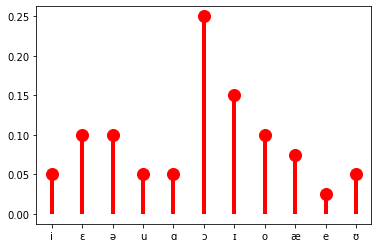

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.plot(list(vowels), categorical.pmf(idx), 'ro', ms=12, mec='r')
ax.vlines(list(vowels), 0, categorical.pmf(idx), colors='r', lw=4)
plt.show()

The [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution), which we will also make extensive use of, is a special case of the categorical distribution where $|X(\Omega)| = 2$. By convention, $X(\Omega) = \{0, 1\}$ In this case, we need to specify the probability $\pi$ for only one value of $X$, since the probability of the other must be $1- \pi$. Indeed, more generally, we need to specify only $|X(\Omega)| - 1$ values for a random variable $X$ that is distributed categorical.

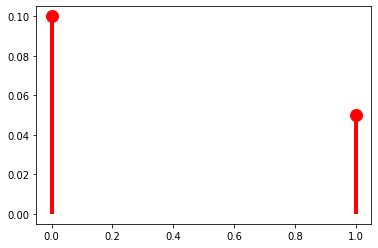

In [ ]:
from scipy.stats import bernoulli

bern = bernoulli(0.25)

# annoyingly, `bernoulli.pmf` seems to be implemented
# to treat `p` as as the probability of 0
fig, ax = plt.subplots(1, 1)
ax.plot([1, 0], categorical.pmf([0, 1]), 'ro', ms=12, mec='r')
ax.vlines([1, 0], 0, categorical.pmf([0, 1]), colors='r', lw=4)
plt.show()


I'll follow the convention of denoting the PMF of a particular kind of distribution using (usually shortened versions of) the distribution's name, with the parameters following a semicolon. (The semicolon notation wil become important as we move through Module 1.)

$$\text{Cat}(x; \boldsymbol\theta) = p_X(x) = \mathbb{P}(X = x) = \mathbb{P}(\{\omega \in \Omega \mid X(\omega) = x\}) = \theta_x$$

To express the above equivalences, I'll often write:

$$X \sim \text{Cat}(\boldsymbol{\theta})$$

This statement is read "$X$ is distributed categorical with parameters $\boldsymbol{\theta}$."

So then the Bernoulli distribution would just be:

$$\text{Bern}(x; \pi) = \begin{cases}\pi & \text{if } x = 1\\1 - \pi & \text{if } x = 0\end{cases}$$

And if a random variable $X$ is distributed Bernoulli with parameter $\pi$, we would write:

$$X \sim \text{Bern}(\pi)$$

It's sometimes useful to write the PMF for the categorical and Bernoulli distributions as:

$$\text{Cat}(x; \boldsymbol\theta) = \prod_{i \in V(\Omega)} \theta_i^{1_{\{x\}}[i]}$$

$$\text{Bern}(x; \pi) = \pi^{x}(1-\pi)^{1-x}$$

where

$$1_A[x] = \begin{cases}1 & \text{if } x \in A\\ 0 & \text{otherwise}\\ \end{cases}$$

In an abuse of notation, I will sometimes write:

$$\text{Cat}(x; \boldsymbol\theta) = \prod_{i \in V(\Omega)} \theta_i^{1_{x}[i]}$$

Categorical and Bernoulli distributions won't be the only finite distributions we work with, but they will be the most common.

#### Countably infinite distributions

When there are a countably infinite number of values that a random variable can take, as in the example of string length $L$ above, the probability of each possibility cannot simply be listed: we need some way of computing it for any value.

However we compute these values, they must sum to one as required by the assumption of unit measure: $\mathbb{P}(\Omega) = 1$. Since $\mathbb{P}(\Omega) = \sum_{x \in X(\Omega)} p_X(x)$, another way of stating this requirement is to say that the series $\sum_{x \in X(\Omega)} p_X(x)$ must converge to 1.

One example of such a series is a geometric series, such as $\sum_{k=1}^\infty \frac{1}{2^k} = \frac{1}{2} + \frac{1}{4} + \frac{1}{8} + \ldots = 1$. This series gives us our first example of a probability distribution with *infinite support*–i.e. one that assigns a non-zero probability to an infinite (but countable) number of values of a random variable. So for instance, if we are considering our random variable $L$ mapping strings to their lengths, $p_X(k) = \frac{1}{2^k}$ is a possible PMF for $L$. (This assumes that strings cannot have zero length, meaning that $\Omega = \Sigma^+$ rather than $\Sigma^*$; if we want to allow zero-length strings $\epsilon$, we would need $p_X(k) = \frac{1}{2^{k+1}}$.)

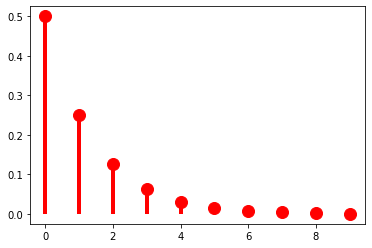

In [ ]:
class parameterless_geometric_gen(rv_discrete):
    "A special case of the geometric distribution without parameters"
    def _pmf(self, k):
        return 2.0 ** -(k+1)

parameterless_geometric = parameterless_geometric_gen(name="parameterless_geometric")

k = np.arange(10)

fig, ax = plt.subplots(1, 1)
ax.plot(k, parameterless_geometric.pmf(k), 'ro', ms=12, mec='r')
ax.vlines(k, 0, parameterless_geometric.pmf(k), colors='r', lw=4)
plt.show()

As it stands, this distribution has no parameters, meaning that we have no control over how quickly the probabilities drop off. The geometric distribution provides us this control using a parameter to $\pi \in (0, 1]$:

$$\text{Geom}(x; \pi) = (1-\pi)^k\pi$$

When $\pi = \frac{1}{2}$, we get exactly the distribution above.

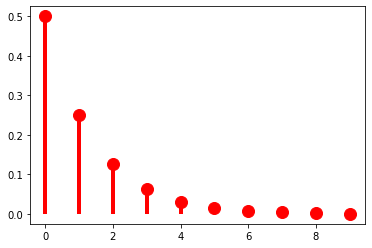

In [ ]:
from scipy.stats import geom

p = 0.5

fig, ax = plt.subplots(1, 1)
ax.plot(k, geom(p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, geom(p).pmf(k+1), colors='r', lw=4)
plt.show()

As $\pi \rightarrow 0$, the distribution flattens out (or becomes *denser*).

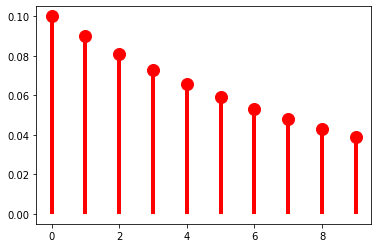

In [ ]:
p = 0.1

fig, ax = plt.subplots(1, 1)
ax.plot(k, geom(p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, geom(p).pmf(k+1), colors='r', lw=4)
plt.show()

And as $\pi \rightarrow 1$, it becomes sharper (or *sparser*).

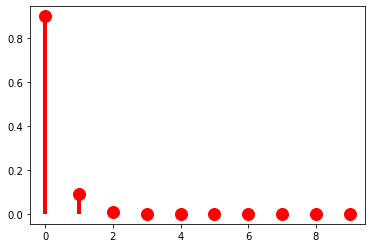

In [ ]:
p = 0.9

fig, ax = plt.subplots(1, 1)
ax.plot(k, geom(p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, geom(p).pmf(k+1), colors='r', lw=4)
plt.show()

At this point, it's useful to pause for a moment to think about what exactly a parameter like $\pi$ is. I said above that random variables and probability distributions together provide a way of classifying probability spaces: in saying that $p_X(k) = (1-\pi)^k\pi$ we are *describing* $\mathbb{P}: \mathcal{F} \rightarrow \mathbb{R}_+$ by using $X$ to abstract across whatever the underlying measurable space $\langle \Omega, \mathcal{F} \rangle$ is. The distribution gives you the form of that description; the parameter $\pi$ gives the content of the description. Because the use of $X$ is always implied, unless it really matters, I'm going to start dropping $X$ from $p_X$ unless I'm emphasizing the random variable in some way.

The $\pi$ parameter of a geometric distribution allows us to describe distributions that have a very particular shape–namely, ones where $\forall k \in \mathbb{N}: p(k) > p(k + 1)$. But this isn't always a good way of describing a particular distribution. For instance, for our string-length variable $L$, it's probably a pretty bad description regardless of what particular distribution on string lengths (type or token) we're describing because 1 grapheme/phoneme words just aren't more frequent than two grapheme/phoneme words. This point can be seen if we look at the distribution of word lengths at the type level in the [CMU Pronouncing Dictionary](http://www.speech.cs.cmu.edu/cgi-bin/cmudict), which contains phonemic transcriptions of English words and which we'll use extensively in Module 2.

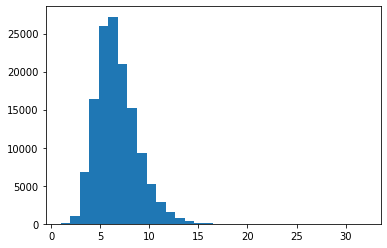

In [ ]:
from urllib.request import urlopen

cmudict_url = "http://svn.code.sf.net/p/cmusphinx/code/trunk/cmudict/cmudict-0.7b"

with urlopen(cmudict_url) as cmudict:
  words = [
      line.split()[1:] for line in cmudict if line[0] != 59
  ]

_ = plt.hist([len(w) for w in words], bins=32)

One such distribution that give us more flexibility in this respect is the [negative binomial distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution), which is a very useful for [modeling token frequency in text](https://doi.org/10.1017/S1351324900000139). This distribution effectively generalizes the geometric by allowing us to control the exponent on $\pi$ with a new parameter $r$.

$$\text{NegBin}(k; \pi, r) = {k+r-1 \choose r-1}(1-\pi)^{k}\pi^{r}$$

This added flexibility in turn requires us to add an additional term ${k+r-1 \choose r-1} = \frac{(k+r-1)!}{(r-1)!\,(k)!}$ that ensures that the series $\sum_{k=0}^\infty \text{NegBin}(k; \pi, r)$ converges to $1$. The pieces of this term that do not include the value we're computing the probability of–i.e. $\frac{1}{(r-1)!}$–are often called the *normalizing constant*. We will make extensive use of this concept as the course moves forward.

When $r = 1$, we of course just get the geometric distribution. As such, if we keep $r = 1$, manipulating $\pi$ will have the same effect we saw above.

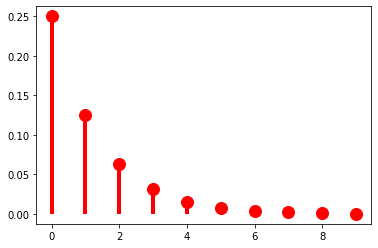

In [ ]:
from scipy.stats import nbinom

p = 0.5
r = 1

fig, ax = plt.subplots(1, 1)
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
plt.show()

As $r$ grows, though, we get very different behavior: $p(k)$ is no longer always greater than $p(k + 1)$. Another way of saying this is that we can use $r$ to shift the probability mass rightward.

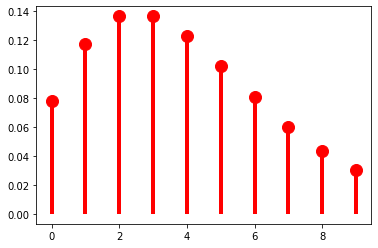

In [ ]:
p = 0.5
r = 5

fig, ax = plt.subplots(1, 1)
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
plt.show()

The mass-shifting effect is modulated by $\pi$: it accelerates with small $\pi$...

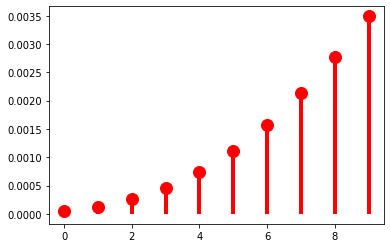

In [ ]:
p = 0.1
r = 5

fig, ax = plt.subplots(1, 1)
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
plt.show()

...but decelerates with large $\pi$.

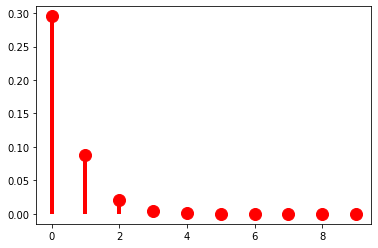

In [ ]:
p = 0.9
r = 5

fig, ax = plt.subplots(1, 1)
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
plt.show()

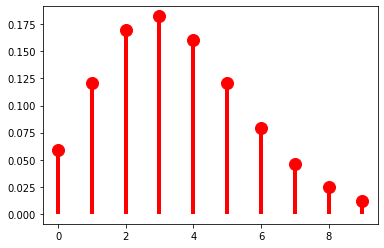

In [ ]:
p = 0.9
r = 40

fig, ax = plt.subplots(1, 1)
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
plt.show()

We won't talk about how to fit a distribution to some data until later, when we talk about parameter estimation; but the negative binomial distribution can provide a reasonably good description of the [empirical distribution](https://en.wikipedia.org/wiki/Empirical_distribution_function) of word lengths. One way to visualize this is to compare the empirical CDF with the CDF of the best fitting negative binomial.

Optimization terminated successfully.
         Current function value: 2.180477
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


p = 0.37, r = 3.71


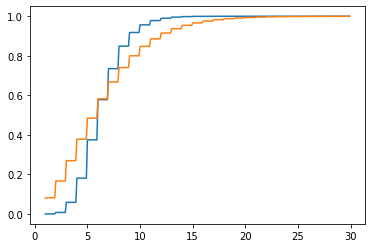

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.discrete.discrete_model import NegativeBinomial

ecdf = ECDF([len(w) for w in words])
negbin_fit = NegativeBinomial([len(w) for w in words], np.ones(len(words))).fit()

p = 1/np.exp(1+negbin_fit.params[0]*negbin_fit.params[1])
r = np.exp(negbin_fit.params[0])*p/(1-p)

print(f"p = {np.round(p, 2)}, r = {np.round(r, 2)}")

k = np.arange(30)

fig, ax = plt.subplots(1, 1)
plt.plot(np.mgrid[1:30:0.1], ecdf(np.mgrid[1:30:0.1]))
plt.plot(np.mgrid[1:30:0.1], nbinom(r, p).cdf(np.mgrid[1:30:0.1]))
plt.show()

A [limiting case](https://en.wikipedia.org/wiki/Negative_binomial_distribution#Poisson_distribution) of the negative binomial distribution that you may be familiar with is the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution).

$$\text{Pois}(k; \lambda) = \frac{\lambda^k\exp(-\lambda)}{k!}$$

The Poisson distribution arises as $\text{Pois}(k; \lambda) = \lim_{r \rightarrow \infty} \text{NegBin}
\left(k; r, \frac{\lambda}{r + \lambda}\right)$.

### Continuous probability distributions

Once we move to working with random variables that have an uncountable number of values–as in the case of our formant value example above, where $X: \mathbb{R}_+^2 \rightarrow \mathbb{R}^2$ is the identity function–we can no longer assign a non-zero probability to every value that variable takes. The intuition for why this is is that there are just too many numbers (e.g. too many posible formant values); and if we assigned non-zero probability to more than countably many of them, we'd end up with a sum across those numbers that doesn't satisfy the the assumption of $\sigma$-additivity. (You'll need to take my word on this point if you haven't proved it before.)

This fact is why we require the event space for an uncountable sample space to be a Borel 𝜎-algebra. Remember that a Borel 𝜎-algebra for the reals will contain all the intervals we might want but not single real numbers. This assumption about the event space in turn means that we don't need to worry about assigning non-zero probability to uncountably many values: indeed, we will *always* assign exactly zero probability to any particular real. (Well. Most of the time.) To restate this: every possibility in a real-valued sample space has probability zero: $\forall x \in \Omega: \mathbb{P}(x) = 0$. This in turn means that a PMF isn't going to be useful here.

What we work with instead is a [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF) $f_X: \Omega \rightarrow \mathbb{R}_+$. Note that the PMF, which I will usually denote $p$ or $p_X$, and the PDF, which I will usually denote $f$ or $f_X$, have the same function signature. It is important to note that they provide very different information: where the PMF tells you the probability of a particular possibility, the PDF does not, though it can be used to compute a probability: specifically, the probability of $X$ taking on a value in some set. So it can be used to tell you $\mathbb{P}(X \in A)$:

$$\mathbb{P}(X \in A) = \int_A f_X(x) \, \mathrm{d}x$$

When the codomain of $X$ is a single value (rather than a vector), we call the distribution univariate; otherwise, we call it multivariate. We can express univariate continuous distributions as:

$$\mathbb{P}(a < X < b) = \int_a^b f_X(x) \, \mathrm{d}x$$

This expressions is a special case of the first:

$$\mathbb{P}(a < X < b) = \mathbb{P}(X \in (a, b)) = \int_{(a, b)} f_X(x) \, \mathrm{d}x$$

We can in turn express the cumulative distribution function $F_X$ in a similar way, but without a lower bound:

$$F_X(b) = \mathbb{P}(X < b) = \int_{-\infty}^b f_X(x) \, \mathrm{d}x$$

It can sometimes be useful to express $\mathbb{P}(a < X < b)$ and $\mathbb{P}(X > x)$ in terms of $F_X$:

$$\mathbb{P}(a < X < b) = F_X(b) - F_X(a)$$
$$\mathbb{P}(X > x) = 1 - F_X(x)$$

#### Univariate continuous uniform distribution

The simplest example of a continuous distribution is the univariate uniform distribution, which is parameterized by an infimum $a$ and a supremum $b$ and has a PDF:

$$\mathcal{U}(x; a, b) = \begin{cases}\frac{1}{b - a} & \text{if } x \in [a, b] \\ 0 & \text{otherwise}\end{cases}$$

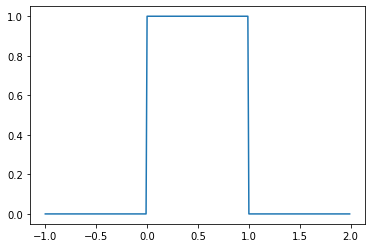

In [ ]:
from scipy.stats import uniform

u = uniform(0, 1)

_ = plt.plot(
    np.mgrid[-1:2:0.01],
    u.pdf(np.mgrid[-1:2:0.01])
)

You'll note that I'm using $\mathcal{U}$–rather than something like $\text{Unif}$–for the name of the PDF. Certain distributions, including the continuous uniform and the normal or gaussian, canonically have such names.

You'll also note that $\mathcal{U}(x; a, b)$ is the PDF, not the PMF. This notational convention is common: for discrete distributions like the negative binomial $\text{NegBin}$ will be used to denote the PMF (or to express that a random variable has a particular distribution), while for continuous distributions like the continuous uniform, $\mathcal{U}$ will be used to denote the PDF (or to express that a random variable has a particular distribution).

Remember that **the PDF does not give you the probability of a value**: the probability of a (continuous) uniformly distributed value $x$ is not $\frac{1}{b - a}$, it is $0$; $\frac{1}{b - a}$ is the value of the density at $x$. This means that:

$$\mathbb{P}(x < X < y) = \int_x^y f_X(z)\,\mathrm{d}z = \frac{\min(y, b) - \max(x, a)}{b - a}$$

where $a = \inf \{x \in X(\Omega) \mid f_X(x) > 0\}$ and $b = \sup \{x \in X(\Omega) \mid f_X(x) > 0\}$. So then, if $a=0$ and $b=1$, $\mathbb{P}(0.25 < X < 0.75) = 0.5$. This can be visualized by filling in the area we're integrating.

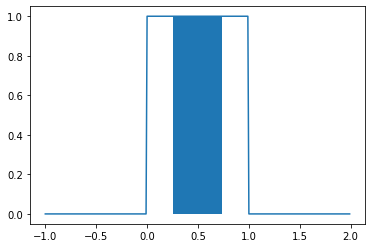

In [ ]:
_ = plt.plot(np.mgrid[-1:2:0.01], u.pdf(np.mgrid[-1:2:0.01]))
_ = plt.fill_between(np.mgrid[0.25:0.75:0.01], u.pdf(np.mgrid[0.25:0.75:0.01]))



Rather than define parameters relative to $X$ every time we want to specify a probability, I'll often write:

$$\mathbb{P}(x < X < y; a, b) = \int_x^y f_X(z)\,\mathrm{d}z = \frac{\min(y, b) - \max(x, a)}{b - a}$$

Or:

$$\mathbb{P}(x < X < y \mid a, b) = \int_x^y f_X(z)\,\mathrm{d}z = \frac{\min(y, b) - \max(x, a)}{b - a}$$

Whether I use the semicolon or pipe will depend on context, as we'll discuss below: it basically comes down to whether I'm assuming that $a$ and $b$ are the values of some underlying random variables–in which case, $\mathbb{P}(x < X < y \mid a, b)$ is really shorthand for something like $\mathbb{P}(x < X < y \mid A=a, B=b)$–or whether they're fixed values given by some oracle.

The CDF $F_X$ for a uniform random variable $X$ is then:

$$F_X(x) = \mathbb{P}(X < x; a, b) = \int_{-\infty}^x f_X(z)\,\mathrm{d}z = \frac{\min(\max(x, a), b) - a}{b - a}$$

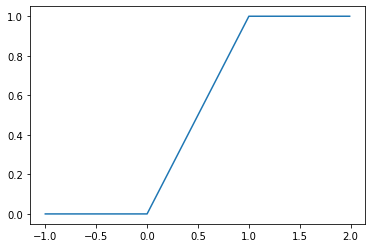

In [ ]:
_ = plt.plot(
    np.mgrid[-1:2:0.01],
    uniform(0, 1).cdf(np.mgrid[-1:2:0.01])
)

#### Beta distribution

Like the geometric distribution, the continuous uniform distribution doesn't give us all the control we might want over the shape of the distribution. We can gain that additional control using a Beta distribution.

$$\text{Beta}(x; \alpha, \beta) = \begin{cases}\frac{x^{\alpha-1}(1-x)^{\beta-1}} {\mathrm{B}(\alpha,\beta)} & \text{if } x \in (0, 1)\\0 & \text{otherwise}\end{cases}$$

where $\mathrm{B}(\alpha,\beta) = \frac {\Gamma (\alpha)\Gamma (\beta)}{\Gamma (\alpha+\beta)}$, the normalizing constant, is known as the [beta function](https://en.wikipedia.org/wiki/Beta_function) and $\Gamma$ (the [gamma function](https://en.wikipedia.org/wiki/Gamma_function)) generalizes the factorial function to real numbers: $\Gamma(x+1) = x\Gamma(x) = x!$ for all positive natural numbers; and more generally, for positive really numbers $\Gamma(x) = \int_0^\infty t^{x-1} e^{-t}\,\mathrm{d}t$.

The beta distribution can be thought of as a generalization of the uniform distribution $\mathcal{U}(0, 1)$, since it is equivalent when $\alpha = \beta = 1$.

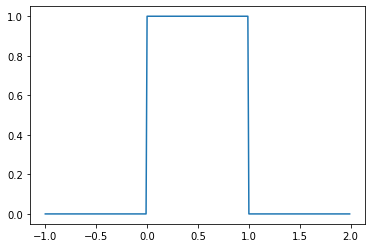

In [ ]:
from scipy.stats import beta

b = beta(1, 1)

_ = plt.plot(
    np.mgrid[-1:2:0.01],
    b.pdf(np.mgrid[-1:2:0.01])
)

Defined this way, the beta distribution has support on (assigns non-zero values) only intervals in $(0, 1)$, but if we ever need support over an arbitrary finite interval $(a, b)$, we can simply add the bounds $a$ and $b$ to the parameterization.

$$\text{Beta}(x; \alpha, \beta, a, b) = \begin{cases}\frac{\left(\frac{x - a}{b - a}\right)^{\alpha-1}\left(1-\frac{x - a}{b - a}\right)^{\beta-1}} {\mathrm{B}(\alpha,\beta)} & \text{if } x \in (a, b)\\0 & \text{otherwise}\end{cases}$$

This definition makes the beta distribution a true generalization of $\mathcal{U}(a, b) = \text{Beta}(1, 1, a, b)$. We'll mainly work with the two-parameter version for the sake of simplicity, and because for most use cases, we actually only need support on $(0, 1)$.

Manipulating the *shape* parameters $\alpha$ and $\beta$ introduces bias toward $0$, $1$, or $\frac{\alpha}{\alpha + \beta}$. When $\alpha = \beta > 1$, we get more and more density closer to $\frac{\alpha}{\alpha + \beta} = 0.5$.

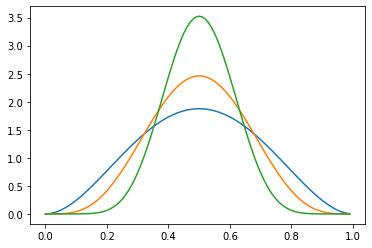

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(3, 3).pdf(np.mgrid[0:1:0.01])
)

_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(5, 5).pdf(np.mgrid[0:1:0.01])
)

_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(10, 10).pdf(np.mgrid[0:1:0.01])
)

If we increase $\alpha$ relative to $\beta > 1$, we shift this density to the right.

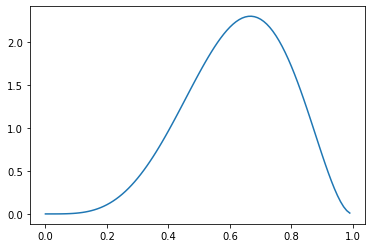

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(5, 3).pdf(np.mgrid[0:1:0.01])
)

And if we increase $\beta$ relative to $\alpha > 1$, we shift the density toward the left.

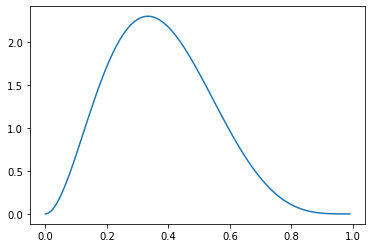

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(3, 5).pdf(np.mgrid[0:1:0.01])
)

In both cases, we have a bias against values nearer to $0$ and $1$ in proportion to how much greater than one the smaller of $\alpha$ and $\beta$ are. We refer to all of these distributions as *dense*.

When either $\alpha > 1 \geq \beta$...

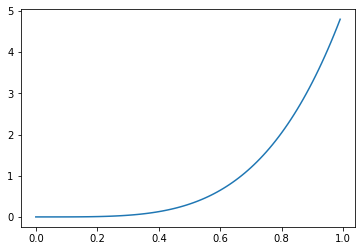

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(5, 1).pdf(np.mgrid[0:1:0.01])
)

...or $\alpha \leq 1 < \beta$, we get bias toward values nearer to $1$ or $0$, respectively.

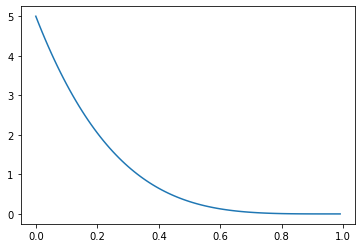

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(1, 5).pdf(np.mgrid[0:1:0.01])
)

And when $\alpha, \beta < 1$, we get a bias toward values near both $0$ and $1$...

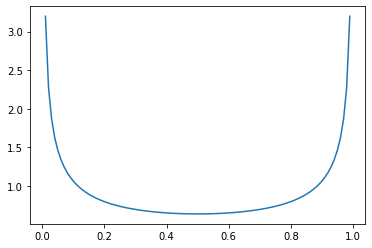

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(0.5, 0.5).pdf(np.mgrid[0:1:0.01])
)

...with more density shifted toward $1$ if $\alpha$ is larger...

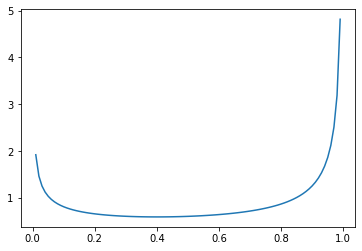

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(0.6, 0.4).pdf(np.mgrid[0:1:0.01])
)

...and more density shifted toward $0$ if $\beta$ is larger.

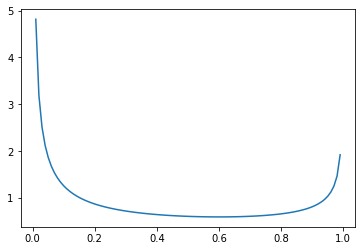

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(0.4, 0.6).pdf(np.mgrid[0:1:0.01])
)

#### Univariate Gaussian distribution

One continuous distribution we will work with extensively in Module 1 is the Gaussian or normal distribution,  which we'll use in modeling the distribution of vowels' formant values. Unlike the continuous uniform and beta distributions,

$$\mathcal{N}(x; \mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

where $\mu$ is referred to as the *mean* and $\sigma^2$ as the *variance*.

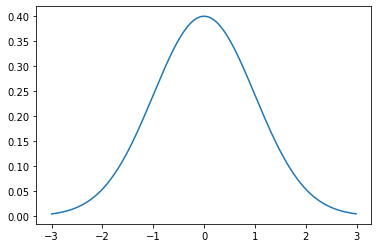

In [ ]:
from scipy.stats import norm

n = norm(0, 1)

_ = plt.plot(np.mgrid[-3:3:0.01], n.pdf(np.mgrid[-3:3:0.01]))

The mean controls the position and the variance controls the width–specifically, the wideness.



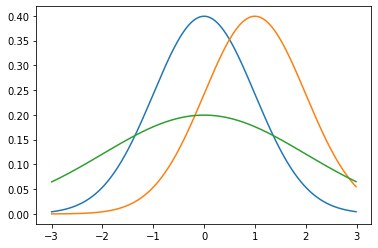

In [ ]:
# mu = 0, sigma^2 = 1
_ = plt.plot(
    np.mgrid[-3:3:0.01],
    norm(0, 1).pdf(np.mgrid[-3:3:0.01])
)

# mu = 1, sigma^2 = 1
_ = plt.plot(
    np.mgrid[-3:3:0.01],
    norm(1, 1).pdf(np.mgrid[-3:3:0.01])
)

# mu = 0, sigma^2 = 2
_ = plt.plot(
    np.mgrid[-3:3:0.01],
    norm(0, 2).pdf(np.mgrid[-3:3:0.01])
)



We say that the distribution is standard normal if the mean $\mu = 0$ and the variance $\sigma^2 = 1$.

As with all continuous distributions, we can compute the cumulative distribution function as:

$$\Phi(x) = \int_{-\infty}^x \mathcal{N}(y; \mu, \sigma^2)\,\mathrm{d}y$$

where $\Phi$ is a common notation for $F_X$, when $X$ is a Gaussian random variable.

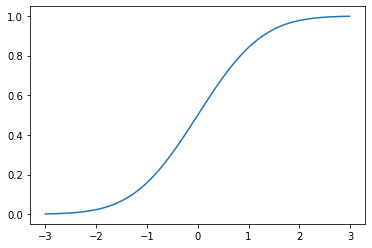

In [ ]:
_ = plt.plot(np.mgrid[-3:3:0.01], norm(0, 1).cdf(np.mgrid[-3:3:0.01]))

$\Phi$ is often referred to as *sigmoidal* or a *sigmoid* for its S shape. These sorts of functions will be very important moving forward–most proximally because they play an important role in models of human perception.

The Gaussian CDF is only one of many continuous CDFs with this shape. The beta CDF is also sigmoidal when $\alpha, \beta \neq 1$.

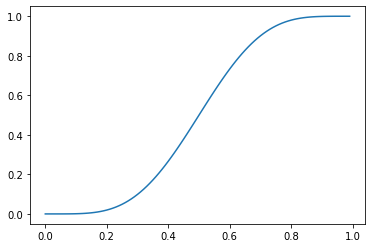

In [ ]:
_ = plt.plot(np.mgrid[0:1:0.01], beta(5, 5).cdf(np.mgrid[0:1:0.01]))

#### Multivariate normal distribution

Perhaps unsurprisingly, a multivariate normal is a generalization of the univariate normal to real-valued vectors $\mathbf{x} \in \mathbb{R}^k$. It's probability density function is:

$$\mathcal{N}(\mathbf{x}; \boldsymbol\mu, \boldsymbol\Sigma) = \frac{1}{\sqrt{(2\pi)^k |\boldsymbol\Sigma|}}\exp\left(-\frac{1}{2} ({\mathbf x}-{\boldsymbol\mu})^\top{\boldsymbol\Sigma}^{-1}({\mathbf x}-{\boldsymbol\mu})\right)$$

where the mean $\boldsymbol\mu \in \mathbb{R}^k$ and the *covariance* $\boldsymbol\Sigma \in \mathbb{R}^{k \times k}$

We're going to spend a lot of time with multivariate normals when we turn to modeling phoneme perception and learning in Module 1, so I'll defer discussion of them until then.

## Some more useful definitions

Since random variables are required to preserve the structure of the event space, the definitions of joint probability, conditional probability, and independence can all be extended to them. The introduction of random variables and probability distributions also allows us to define a notion of [expected value](https://en.wikipedia.org/wiki/Expected_value).

### Joint probability

Defining the joint probability of random variables $X$ and $Y$ with underlying probabiliy spaces $\langle \Omega_X, \mathcal{F}_X, \mathbb{P}_X \rangle$ and $\langle \Omega_Y, \mathcal{F}_Y, \mathbb{P}_Y \rangle$ requires us to define a new probability space $\langle \Omega_X \times \Omega_Y, \mathcal{F}_{X, Y}, \mathbb{P}_{X, Y} \rangle$, where $\mathcal{F}_{X, Y}$ is the [product $\sigma$-algebra](https://en.wikipedia.org/wiki/%CE%A3-algebra#Product_%CF%83-algebra) $\sigma\left(\left\{E_X \times E_Y \mid E_X \in \mathcal{F}_X, E_Y \in \mathcal{F}_Y\right\}\right)$ on $\Omega_X \times \Omega_Y$. We then define the joint distribution $p_{X, Y}$ in terms of $X'(\omega_X, \omega_Y) = X(\omega_X)$ and $Y'(\omega_X, \omega_Y) = Y(\omega_Y)$:

$$\begin{align*}p_{X, Y}(x, y) &= \mathbb{P}_{X, Y}(X' = x, Y' = y)\\ &= \mathbb{P}_{X, Y}\left(\{\langle\omega_X, \omega_Y\rangle \mid X'(\langle\omega_X, \omega_Y\rangle) = x\}, \{\langle\omega_X, \omega_Y\rangle \mid Y'(\langle\omega_X, \omega_Y\rangle) = y\}\right)\\ &= \mathbb{P}_{X, Y}\left(\{\langle\omega_X, \omega_Y\rangle \mid X'(\langle\omega_X, \omega_Y\rangle) = x\} \cap \{\langle\omega_X, \omega_Y\rangle \mid Y'(\langle\omega_X, \omega_Y\rangle) = y\}\right)\\ &= \mathbb{P}_{X, Y}\left(\{\langle\omega_X, \omega_Y\rangle \mid X'(\langle\omega_X, \omega_Y\rangle) = x \land Y'(\langle\omega_X, \omega_Y\rangle) = y\}\right)\\ &= \mathbb{P}_{X, Y}\left(\{\langle\omega_X, \omega_Y\rangle \mid X(\omega_X) = x \land Y'(\omega_Y) = y\}\right)\end{align*}$$

where $p_{X, Y}$ (and thus $\mathbb{P}_{X, Y}$) must be such that the *marginal distributions* $p_X$ and $p_Y$ satisfy:

$$p_X(x) = \begin{cases}\sum_{y \in Y(\Omega_Y)} p_{X, Y}(x, y) & \text{if $Y$ is discrete} \\ \int_{Y(\Omega_Y)} p_{X, Y}(x, y)\,\mathrm{d}y & \text{if $Y$ is continuous} \\ \end{cases}$$

$$p_Y(y) = \begin{cases}\sum_{x \in X(\Omega_X)} p_{X, Y}(x, y) & \text{if $X$ is discrete} \\ \int_{X(\Omega_X)} p_{X, Y}(x, y)\,\mathrm{d}x & \text{if $X$ is continuous} \\ \end{cases}$$

I'll sometimes simply write $p(X, Y)$ (with $X$ and $Y$ random variables) or $p(x, y)$ (with $x$ and $y$ values of implicit random variables) instead of $p_{X, Y}(x, y)$. I'll often use $p$ here, even when both $X$ and $Y$ are continuous. I'll also often drop all but the variable of summation/integration from the sum or integral over the range of a random variable. So I'll write things like...

$$p(x) = \begin{cases}\sum_{y} p(x, y) & \text{if $Y$ is discrete} \\ \int p(x, y)\,\mathrm{d}y & \text{if $Y$ is continuous} \\ \end{cases}$$

...rather than...

$$p_X(x) = \begin{cases}\sum_{y \in Y(\Omega_Y)} p_{X, Y}(x, y) & \text{if $Y$ is discrete} \\ \int_{Y(\Omega_Y)} p_{X, Y}(x, y)\,\mathrm{d}y & \text{if $Y$ is continuous} \\ \end{cases}$$

Just remember that $p_{X, Y}$ is a different function from $p_X$ or $p_Y$–even when I write $p(x, y)$, $p(x)$, or $p(y)$, rather than the more verbose $p_{X, Y}(x, y)$, $p_X(x)$, or $p_Y(y)$.

### Conditional probability

The conditional probability of a random variable $X$ given a random variable $Y$ is defined in terms of their joint probability and the marginal probability of $Y$:

$$p_{X \mid Y}(x \mid y) \equiv \frac{p_{X, Y}(x, y)}{p_{Y}(y)} = \begin{cases}\frac{p_{X, Y}(x, y)}{\sum_{x'} p_{X, Y}(x', y)} & \text{if $X$ is discrete} \\ \frac{p_{X, Y}(x, y)}{\int p_{X, Y}(x', y)\,\mathrm{d}x'} & \text{if $X$ is continuous} \\ \end{cases}$$

### Independence

We can extend the definition of independent events to that of independent random variables by saying that two random variables $X$ and $Y$ are independent if and only if:

$$p_{X \mid Y}(x \mid y) = p_X(x)$$
$$p_{Y \mid X}(y \mid x) = p_Y(y)$$

By the same reasoning as for independent events, this in turn implies that:

$$p_{X, Y}(x, y) = p_X(x)p_Y(y)$$

We say that two random variables $X$ and $Y$ are conditionally independent given another $Z$ if and only if:

$$p_{X \mid Y, Z}(x \mid y, z) = p_{X \mid Z}(x \mid z)$$
$$p_{Y \mid X, Z}(y \mid x, z) = p_{Y \mid Z}(y \mid z)$$

As before, this implies that:

$$p_{X, Y \mid Z}(x, y \mid z) = p_{X \mid Z}(x \mid z)p_{Y \mid Z}(y \mid z)$$

Note that being conditionally independent is not the same as being independent.

### Expected values

The *expected value* $\mathbb{E}[X]$ of a random variable $X$ can be thought of as a kind of weighted average over the values of that variable. When the variable is discrete, this average is computed using a sum.

$$\mathbb{E}[X] \equiv \sum_{x} x \cdot p_X(x)$$

When the variable is continuous, this average is computed using an integral.

$$\mathbb{E}[X] \equiv \int x \cdot f_X(x) \, \mathrm{d}x$$

The expected value of a random variable $X$ is often referred to as the *mean of* $X$. Given a PMF or PDF of a probability distribution, we can often (though not always) compute the mean analytically in terms of the distribution's parameters. For instance, the mean of a random variable $X \sim \text{Geom}(\pi)$ is:

$$\mathbb{E}[X] = \sum_{k=0}^\infty k \cdot (1-\pi)^k\pi = \frac{1-\pi}{\pi}$$

And the mean of a random variable $X \sim \text{Beta}(\alpha, \beta)$ is:

$$\mathbb{E}[X] = \int_0^1 x \cdot \frac{x^{\alpha - 1}(1-x)^{\beta-1}}{\text{B}(\alpha, \beta)} \, \mathrm{d}x = \frac{\alpha}{\alpha + \beta}$$

The mean of a [Cauchy-distributed random variable](https://en.wikipedia.org/wiki/Cauchy_distribution) $X \sim \text{Cauchy}(x_0, \gamma)$ is one instance of a random variable where $\mathbb{E}[X]$ is not defined. This fact is not immediately obvious from its PDF.

$$\text{Cauchy}(x; x_{0},\gamma )={\frac {1}{\pi \gamma \left[1+\left({\frac {x-x_{0}}{\gamma }}\right)^{2}\right]}}$$

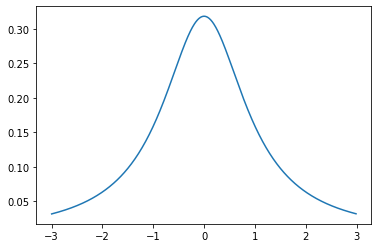

In [ ]:
from scipy.stats import cauchy

_ = plt.plot(np.mgrid[-3:3:0.01], cauchy(0, 1).pdf(np.mgrid[-3:3:0.01]))

The moral is to be careful in assuming that the expected value is always defined.

#### Expected value of a function of a random variable

We'll often have cause to take the expected value of some function $g(X) \equiv g \circ X$ of a random variable, which we define as:

$$\mathbb{E}\left[g(X)\right] \equiv \begin{cases}\sum_{x} g(x) \cdot p(x) & \text{if $X$ is discrete} \\ \int g(x) \cdot f(x) \, \mathrm{d}x & \text{if $X$ is continuous} \\ \end{cases}$$

For simple [affine functions](https://en.wikipedia.org/wiki/Affine_transformation), it is straightforward to prove that $\mathbb{E}\left[aX + b\right] = a\mathbb{E}\left[X\right] + b$. But it's important to note that $\mathbb{E}\left[g(X)\right] \neq g\left(\mathbb{E}\left[X\right]\right)$ in general (though if $g$ is [convex](https://en.wikipedia.org/wiki/Convex_function), $\mathbb{E}\left[g(X)\right] \geq g\left(\mathbb{E}\left[X\right]\right)$ by [Jensen's inequality](https://en.wikipedia.org/wiki/Jensen%27s_inequality)).

#### Central moments

One function of a random variable we'll use frequently is $\left(X - \mathbb{E}[X]\right)^k$, which gives us the concept of a [central moment](https://en.wikipedia.org/wiki/Central_moment):

$$\mathbb{E}\left[\left(X - \mathbb{E}[X]\right)^k\right] = \begin{cases}\sum_{x \in X(\Omega)} \left(x - \mathbb{E}[X]\right)^k \cdot p_X(x) & \text{if $X$ is discrete} \\ \int_{X(\Omega)} \left(x - \mathbb{E}[X]\right)^k \cdot f_X(x) \, \mathrm{d}x & \text{if $X$ is continuous} \\ \end{cases}$$

The second central moment $\mathbb{E}\left[\left(X - \mathbb{E}[X]\right)^2\right]$ is known as the [variance](https://en.wikipedia.org/wiki/Variance) $\mathbb{V}\left[X\right]$ or $\text{Var}[X]$, which is a common measure of [dispersion](https://en.wikipedia.org/wiki/Statistical_dispersion). Another common measure of dispersion, the standard deviation, is simply $\sqrt{\mathbb{V}[X]}$.

Like the expected value/mean, the variance of a particular distribution can often be computed analytically in terms of the distribution's parameters. For instance, the variance of a random variable $X \sim \text{Geom}(\pi)$ is:

$$\mathbb{V}[X] \equiv \sum_{k=0}^\infty (k - \mathbb{E}[X])^2 \cdot (1-\pi)^k\pi$$

can often be computed If $X \sim \mathcal{N}(\mu, \sigma^2)$ , then $\mathbb{E}[X] = \mu$ and $\mathbb{V}[X] = \sigma^2$, hence the names *mean* and *variance* for those parameters.

#### Covariance and correlation

It is often useful to know how two random variables $X$ and $Y$ "move together" or *covary*. We can measure this *covariance* by extending variance $\mathbb{V}[X]$, which is a property of a single random variable, to covariance, which is a property of pairs of random variables with a joint distribution $p_{X, Y}$. Assuming both $X$ and $Y$ are continuous and real-valued:

$$\begin{align*}\text{cov}(X, Y) &= \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]\\ &= \int_{\mathbb{R}^2} (x - \mathbb{E}[X]) \cdot (y - \mathbb{E}[Y]) \cdot p(x, y) \, \mathrm{d}\langle x, y \rangle \\ &= \int_{\mathbb{R}} \left[\int_{\mathbb{R}} (x - \mathbb{E}[X]) \cdot (y - \mathbb{E}[Y]) \cdot p(x, y) \, \mathrm{d}x\right]\, \mathrm{d}y\end{align*}$$

If either are discrete, we just replace the integral over that variable with a sum.

The covariance of a random variable with itself is just the variance:

$$\text{cov}(X, X) \equiv \mathbb{E}[(X - \mathbb{E}[X])(X - \mathbb{E}[X])] = \mathbb{V}[X]$$

The covariance has units corresponding to whatever the units of $X$ and $Y$ are: for instance, if both were formant values, the units would be frequency. The (Pearson) correlation normalizes these units away to a quantity in $[-1, 1]$, which can be useful if the variables have different units whose product is not itself interpretable.

$$\text{corr}(X, Y) \equiv \frac{\text{cov}(X, Y)}{\sqrt{\mathbb{V}[X]}\sqrt{\mathbb{V}[Y]}}$$

This quantity is guaranteed to be between $[-1, 1]$ due to an application of the [Cauchy-Schwarz inequality](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality#Probability_theory):

$$\text{cov}(X, Y)^2 \leq \mathbb{V}[X] \cdot \mathbb{V}[Y]$$

#### Conditional expectation

In certain cases, we need the expected value of one random variable $X$ conditioned on another random variable $Y$: $\mathbb{E}[X \mid Y]$. In the case where we known the value of $Y$ (or want to assume we do):

$$\mathbb{E}[X \mid Y = y] = \begin{cases}\sum_x x \cdot p(x \mid y) & \text{if } X \text{ is discrete} \\ \int x \cdot p(x \mid y) \, \mathrm{d}x & \text{if } X \text{ is continuous}\end{cases}$$

Thus, we could think of $\mathbb{E}[X \mid Y = y]$ as a function $g: \mathrm{cod}(Y) \rightarrow \mathrm{cod}(X)$.

Alternatively, we can think of $\mathbb{E}[X \mid Y]$ as a random variable $g(Y) = g \circ Y: \mathrm{dom}(Y) \rightarrow \mathrm{cod}(X)$, where $\mathrm{dom}(Y)$ is the sample space of the probability space underlying $Y$.

# Statistical Inference

The concepts we've discussed so far provide us a space of possible descriptions of the world coming from probability theory, but they do not give us a way of grounding that description, thereby imbuing it with content. This is the role of statistics in general and [statistical inference](https://en.wikipedia.org/wiki/Statistical_inference) in particular. A good bit of the remainder of the course will cover different forms of statistical inference. In this section, my aim is to give you a taste of two of the major forms of statistical inference we'll use throughout the course in increasing more complex forms: [frequentist inference](https://en.wikipedia.org/wiki/Frequentist_inference) and [Bayesian inference](https://en.wikipedia.org/wiki/Bayesian_inference). Unless you have explicitly been introduced to Bayesian inference, frequentist inference is probably the form you are most familiar with through the use of constructs like [$p$-values](https://en.wikipedia.org/wiki/P-value) and [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval).

The overall goal of statistical inference is to find a good description of (some property of) a *population* in terms of probability distributions. The notion of population is very abstract; it could be basically any of the things we might be interested in defining a probability model for: formant values, vowels, well-formed strings of phonemes, morhpemes, words, etc. We will generally start out with some assumptions about the family of distributions that might best describe the population and then on the basis of data sampled from the population attempt to determine which distribution in the family is the best description.

As a running example, I'll consider a case where...

$$X_i \sim \text{Bern}(\pi)$$

...and $X_i$ is independent of $X_j$ for all $i \neq j$. In this case, we say that the collection of random variables $\{X_1, X_2, \ldots\}$ is independent and identically distributed (iid).

Here, our description of our population is $\text{Bern}(\pi)$ and $X_i$ is a random variable corresponding to the $i^{th}$ sample we've taken from the population. To ground this example a bit more, we could think of our population as the set of vowels and $X_i$ as an indicator of whether, on the $i^{th}$ sample, we observed vowel is high $X = 1$ or not $X = 0$. This example is pretty contrived, but I mainly want to keep the complexity low for current purposes.

One thing we might be interested in inferring is what the value of $\pi$ is.

## Frequentist inference

In frequentist inference, we assume that $\pi$ is a fixed value–some aspect of the world we are attempting to discover (or at least approximate). One popular way to attempt to approximate (or **estimate*) this value is through use of the likelihood function $\mathcal{L}_\mathbf{x}(\pi) = p_{X_1, X_2, \ldots, X_N}(\mathbf{x} = x_1, x_2, \ldots, x_N; \pi)$. (I'm using $\mathcal{L}_\mathbf{x}(\pi)$ to emphasize that $\mathcal{L}$ is parameterized by $\mathbf{x}$. Another notation, which means the same thing but which I think is initially more confusing, is $\mathcal{L}(\pi \mid \mathbf{x})$.) One common way to use the likelihood function in this way is [maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) (MLE). In MLE, we derive an estimate $\hat\pi$ by...maximizing the likelihood.

$$\begin{align*}\hat\pi &= \arg_\pi\max\mathcal{L}_\mathbf{x}(\pi)\\ &= \arg_\pi\max p_{X_1, X_2, \ldots, X_N}(\mathbf{x}; \pi)\end{align*}$$

Because $X_1, X_2, \ldots, X_N$ are iid by assumption (whether we observe a high vowel on the $i^{th}$ observation doesn't depend on whether we observed it on any other), we can express this quantity as:

$$\begin{align*}\hat\pi &= \arg_\pi\max p_{X_1, X_2, \ldots}(\mathbf{x}; \pi)\\ &= \arg_\pi\max \prod_{i=1}^N p_{X_i}(x_i; \pi)\\ &= \arg_\pi\max \prod_{i=1}^N \text{Bern}(x_i; \pi)\\ &= \arg_\pi\max \prod_{i=1}^N \pi^{x_i}(1-\pi)^{1-x_i}\\\end{align*}$$

To make this form easier to work with, we will often maximize the log of the likelihood rather than the likelihood directly. (Equivalently, we will sometimes minimize the negative of the log-likelihood.) Taking the logarithm gives us the same result for the argmax, since logarithms are [monotone increasing](https://en.wikipedia.org/wiki/Monotonic_function).

$$\begin{align*}\hat\pi &= \arg_\pi\max \mathcal{L}_\mathbf{x}(\pi)\\ &= \arg_\pi\max\log\mathcal{L}_\mathbf{x}(\pi) \\ &= \arg_\pi\max \log\prod_{i=1}^N \pi^{x_i}(1-\pi)^{1-x_i}\\ &= \arg_\pi\max \sum_{i=1}^N \log\left( \pi^{x_i}(1-\pi)^{1-x_i}\right)\\ &= \arg_\pi\max \sum_{i=1}^N x_i \log \pi + (1-x_i)\log(1-\pi)\\\end{align*}$$

One reason to express the maximization in terms of the log-likelihood, rather than the likelihood, is that it allows us to exchange a product for a sum. This sum makes it easier to compute the derivative, which we will use to maximize $\pi$....

$$\begin{align*}\frac{\mathrm{d}}{\mathrm{d}\pi}\log\mathcal{L}_\mathbf{x}(\pi) &= \frac{\mathrm{d}}{\mathrm{d}\pi}\sum_{i=1}^N x_i \log \pi + (1-x_i)\log(1-\pi)\\ &= \sum_{i=1}^N \frac{\mathrm{d}}{\mathrm{d}\pi} x_i \log \pi + (1-x_i)\log(1-\pi)\\ &= \sum_{i=1}^N \frac{x_i -\pi}{p(1-\pi)}\\ &= \sum_{i=1}^N \frac{x_i}{\pi(1-\pi)} - \frac{1}{1-\pi}\\ &= \left[\frac{1}{\pi(1-\pi)}\sum_{i=1}^N x_i\right] - \frac{N}{1-\pi}\end{align*}$$

...by setting it to zero.

$$\begin{align*}\left[\frac{1}{\hat\pi(1-\hat\pi)}\sum_{i=1}^N x_i\right] - \frac{N}{1-\hat\pi} &= 0 \\ \frac{1}{\hat\pi(1-\hat\pi)}\sum_{i=1}^N x_i &= \frac{N}{1-\hat\pi} \\ \sum_{i=1}^N x_i &= N\hat\pi \\ \frac{\sum_{i=1}^N x_i}{N} &= \hat\pi \\ \end{align*}$$

Thus, the maximum likelihood estimate $\hat\pi$ for a particular set of samples $x_1, x_2, \ldots, x_N$ is simply the *sample mean* for $X_1, X_2, \ldots, X_N$: $\frac{\sum_{i=1}^N x_i}{N}$ (the number of high vowels we observed over the number of vowels we observed in total). View as a function of $\mathbf{x}$, we call $\hat\pi(\mathbf{x}) = \frac{\sum_{i=1}^N x_i}{N}$ the *maximum likelihood [estimator](https://en.wikipedia.org/wiki/Estimator)* for the Bernoulli parameter (the *estimand*) $\pi$.

Viewed as a function of some fixed quantity $\hat\pi(\mathbf{x})$ is to the conditional expectation $\mathbb{E}[X \mid Y = y]$, which we viewed as a function of the value $y$ of the random variable $Y$. Here, we would consider $\arg\pi\max\mathcal{L}_\mathbf{x}(\pi)$ as a function of the values $x_1, x_2, \ldots, x_N$ of the random variables $X_1, X_2, \ldots, X_N$.

But similar to our discussion of conditional expectations, we will often talk about the estimator itself as a random variable that is a function of some other set of random variables $X_1, X_2, \ldots, X_N$. The view of $\hat\pi(\mathbf{X})$ as a random variable in turn allows us to talk about the distribution of $\hat\pi(\mathbf{X})$ as well the distributions of functions on that random variable.

In the case of $X_i \sim \text{Bern}(\pi)$, $N\hat\pi(X_1, X_2, \ldots, X_N) \sim \text{Binomial}(N, \pi)$:

$$p_{N\hat\pi(X_1, X_2, \ldots, X_N)}(k) = {N \choose k}\pi^{k}(1-\pi)^{N-k}$$

You can get a sense for why this is by noting that any particular assignment $X_1 = x_1, X_2 = x_2, \ldots, X_N = x_N$ has a probability $p(x_1, x_2, \ldots, x_N) = \prod_{i=1}^N \pi^{x_i}(1-\pi)^{(1-x_i)} = \pi^{\sum_{i=1}^N x_i}(1-\pi)^{\sum_{i=1}^N (1-x_i)}$ but that many other configurations will average to the same thing as $x_1, x_2, \ldots, x_N$ because they sum to the same thing as $x_1, x_2, \ldots, x_N$. The number of such configurations is given by the [binomial coefficient](https://en.wikipedia.org/wiki/Binomial_coefficient) ${N \choose k} =  \frac {n!}{k!(n-k)!}$, which tells you the number of ways of selecting $x_i = 1$ such that the sum is $k$.

We can alternatively see that the estimator has this distribution by simulation.

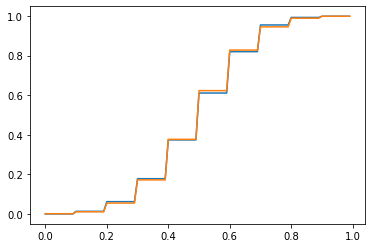

In [ ]:
from scipy.stats import binom

def sample_bernoulli_sample_mean(p: float, n: int) -> float:
  return np.mean(bernoulli(p).rvs(n))

n = 10
p = 0.5

samples = [sample_bernoulli_sample_mean(p, n) for _ in range(1000)]
ecdf = ECDF(samples)

fig, ax = plt.subplots(1, 1)
plt.plot(np.mgrid[0:n:0.1]/n, ecdf(np.mgrid[0:n:0.1]/n))
plt.plot(np.mgrid[0:n:0.1]/n, binom(n, p).cdf(np.mgrid[0:n:0.1]))
plt.show()

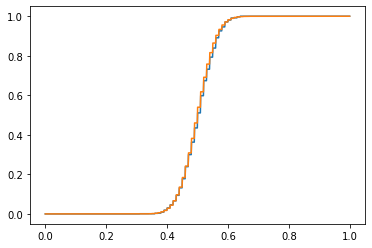

In [ ]:
n = 100
p = 0.5

samples = [sample_bernoulli_sample_mean(p, n) for _ in range(1000)]
ecdf = ECDF(samples)

fig, ax = plt.subplots(1, 1)
plt.plot(np.mgrid[0:n:0.1]/n, ecdf(np.mgrid[0:n:0.1]/n))
plt.plot(np.mgrid[0:n:0.1]/n, binom(n, p).cdf(np.mgrid[0:n:0.1]))
plt.show()

One such important distribution is that of the error.

$$e(\hat\pi(\mathbf{X})) = \hat\pi(\mathbf{X}) - \pi$$

We can describe this distribution as $N (\pi + e(\hat\pi(\mathbf{X}))) \sim \text{Binomial}(N, \pi)$.

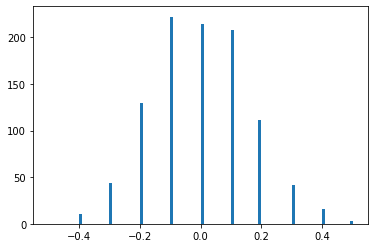

In [ ]:
def sample_bernoulli_sample_mean_error(p: float, n: int) -> float:
  return sample_bernoulli_sample_mean(p, n) - p

_ = plt.hist([sample_bernoulli_sample_mean_error(0.5, 10) for _ in range(1000)], bins=100, range=[-0.5, 0.5])

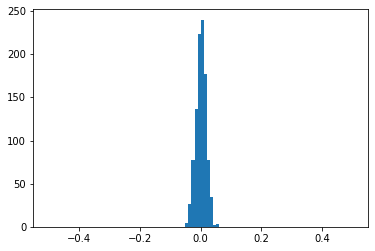

In [ ]:
_ = plt.hist([sample_bernoulli_sample_mean_error(0.5, 1000) for _ in range(1000)], bins=100, range=[-0.5, 0.5])

It also allows us to define two important quantities associated with the *estimator*: the *bias*, which is equivalent to the expected value of the error...

$$b(\hat\pi(\mathbf{X})) = \mathbb{E}[\hat\pi(\mathbf{X})] - \pi = \mathbb{E}[\hat\pi(\mathbf{X}) - \pi]$$

...and the *mean squared error* (MSE).

$$\text{MSE}(\hat\pi(\mathbf{X})) = \mathbb{E}\left[(\hat\pi(\mathbf{X}) - \pi)^2\right]$$

Both are ways of quantifying how off we will tend to be in estimating the parameter of interest at a particular sample size. So for instance, for the maximum likelihood estimator we've been looking at:

$$\text{b}(\hat\pi(\mathbf{X})) = \sum_{k=0}^N \left(\frac{k}{N} - \pi\right) \cdot {N \choose k}\pi^k(1-\pi)^{N-k}$$

$$\text{MSE}(\hat\pi(\mathbf{X})) = \sum_{k=0}^N \left(\frac{k}{N} - \pi\right)^2 \cdot {N \choose k}\pi^k(1-\pi)^{N-k}$$

Thus, while the bias of this estimator is 0, the MSE starts relatively high and goes down as $N \rightarrow \infty$, and it goes down faster the further from 0.5 $\pi$ is.

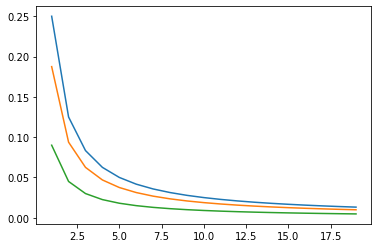

In [ ]:
def bernoulli_mle_mse(n, p):
  return np.sum((np.arange(n+1)/n - p)**2 * binom(n, p).pmf(np.arange(n+1)))

sample_sizes = np.arange(1, 20)

_ = plt.plot(sample_sizes, [bernoulli_mle_mse(n, 0.5) for n in sample_sizes])
_ = plt.plot(sample_sizes, [bernoulli_mle_mse(n, 0.75) for n in sample_sizes])
_ = plt.plot(sample_sizes, [bernoulli_mle_mse(n, 0.9) for n in sample_sizes])

We say that an estimator is unbiased if the bias of the estimator is $0$; otherwise it's biased. Therefore, the maximum likelihood estimator for the Bernoulli parameter is unbiased: it's always $0$, regardless of the sample size.

But maximum likelihood estimators for many other distributions are not. For instance, the maximum likelihood estimator $\hat\mu(\mathbf{X})$ for the mean $\mu$ of a univariate normal distribution is also the sample mean $\hat\mu(\mathbf{x}) = \frac{\sum_{i=1}^N x_i}{N}$, and this estimator is unbiased. In contrast, the maximum likelihood estimator $\hat\sigma^2(\mathbf{X})$ for the variance $\sigma^2$ is the sample variance $\hat\sigma^2(\mathbf{x}) = \frac{\sum_{i=1}^N \left(x_i - \hat\mu(\mathbf{x})\right)^2}{N}$, but this estimator is biased: $b\left(\hat\sigma^2(\mathbf{X})\right) = -\frac{\sigma^2}{N}$. That is, in expectation, it underestimates the true variance by $-\frac{\sigma^2}{N}$. (I won't work through why this is, but you can find a proof [here](https://proofwiki.org/wiki/Bias_of_Sample_Variance).) It's for this reason that you'll often see an alternative estimator of the variance used: $s^2(\mathbf{X}) = \frac{\sum_{i=1}^N \left(x_i - \hat\mu(\mathbf{x})\right)^2}{N-1}$.

In general, we aren't going to worry too much about bias (indeed, in some sense, we're going to lean into biased estimators), but it is useful to know the above if you haven't seen it before.

## Bayesian Inference

The maximum likelihood estimate is what's known as a [point estimate](https://en.wikipedia.org/wiki/Point_estimation) because it's a single number that gives the "best" estimate for the parameter given a way of estimating that parameter, such as MLE. But often we want to know how much uncertainty we should have about that estimate. For instance, if I compute the maximum likelihood estimate on the basis of only a single sample, that estimate, which will be either $0$ or $1$, will probably be terrible, even though, as we just discussed, the estimator is unbiased: it's expected error is $0$. The MSE gives us some indication of how much to trust the estimate (less with smaller sample sizes and more with larger sample sizes), but it doesn't really tell us which other possible estimates might be reasonable values.

Before talking about how we deal with this issue in Bayesian inference, I first want to discuss one way that frequentist inference deals with uncertainty and that you might be familiar with: [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval). The main reason I want to discuss confidence intervals is because they are tricky: their interpretation seems a lot clearer than it actual is.

A confidence interval for some parameter $\pi$ at some confidence level $\gamma \in (0, 1)$ is an interval $(l(\mathbf{X}), u(\mathbf{X}))$ whose bounds are determined by a pair of random variables $l(\mathbf{X})$ and $u(\mathbf{X})$. In being random variables, we can compute probabilities of events defined in terms of them. The probability that is relevant in constructing a confidence interval is $\mathbb{P}\left(l(\mathbf{X}) < \theta < u(\mathbf{X})\right)$. To construct a confidence interval at level $\gamma$, we're going to find the values of $l(\mathbf{X})$ and $u(\mathbf{X})$ such that $\mathbb{P}\left(l(\mathbf{X}) < \theta < u(\mathbf{X})\right) = \gamma$.

Often, this interval needs to be approximated; and even in the case of the Bernoulli parameter, there are a variety of ways of doing this approximation. One way to do it is using the [Clopper-Pearson method](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Clopper%E2%80%93Pearson_interval), which computes the interval as:

$$l(\mathbf{x}) = \inf \left\{\theta \,\,{\Big |}\,\,\left[\sum_{k=\sum_{i=0}^N x_i}^N\operatorname {Bin} \left(k; N, \theta \right)\right]>{\frac {1 - \gamma }{2}}\right\}$$

$$u(\mathbf{x}) = \sup\left\{\theta \,\,{\Big |}\,\,\left[\sum_{k=0}^{\sum_{i=0}^N x_i}\operatorname {Bin} \left(k; N, \theta \right)\right]>{\frac {1 - \gamma }{2}}\right\}$$

In [ ]:
from statsmodels.stats.proportion import proportion_confint

ci = np.round(proportion_confint(count=2, nobs=10, method='beta'), 2)

print(f"successes = 2\tobservations = 10\t95% CI={ci}")

ci = np.round(proportion_confint(count=20, nobs=100, method='beta'), 2)

print(f"successes = 20\tobservations = 100\t95% CI={ci}")

ci = np.round(proportion_confint(count=200, nobs=1000, method='beta'), 2)

print(f"successes = 200\tobservations = 1000\t95% CI={ci}")

successes = 2	observations = 10	95% CI=[0.03 0.56]
successes = 20	observations = 100	95% CI=[0.13 0.29]
successes = 200	observations = 1000	95% CI=[0.18 0.23]


Alternatively, we'll very frequently compute confidence intervals via nonparametric bootstraps. In the simplest form of a nonparametric bootstrap, we take a dataset and resample it *with* replacement many times, thereby simulating the experiment on the basis of the distribution of samples. On each resampling, we compute the statistic of interest. Then, we compute the $\frac{1-\gamma}{2}$ and $1-\frac{1-\gamma}{2}$ quantiles of the collection of statistics–i.e. the values $l$ and $u$ such that $\frac{1-\gamma}{2}$ of the statistics are less the $l$ and $\frac{1-\gamma}{2}$ are greater than $u$.

In [ ]:
from typing import Tuple, Iterable
from numpy.random import choice

def bootstrap_mean(x: Iterable, gamma: float=0.95, n_iter: int=10000) -> Tuple[float]:
  """ """
  alpha = 1 - gamma

  resampled = [choice(x, len(x)) for _ in range(n_iter)]
  means = [np.mean(resamp) for resamp in resampled]

  cilo, est, cihi = np.quantile(means, [alpha/2, 0.5, 1 - alpha/2])

  return est, (cilo, cihi)

samples_10 = np.concatenate([np.ones(2), np.zeros(8)])
est, ci = bootstrap_mean(samples_10)

print(f"successes = 2\tobservations = 10\testimate: {est}\t95% CI={ci}")

samples_100 = np.concatenate([np.ones(20), np.zeros(80)])
est, ci = bootstrap_mean(samples_100)

print(f"successes = 20\tobservations = 100\testimate: {est}\t95% CI={ci}")

samples_1000 = np.concatenate([np.ones(200), np.zeros(800)])
est, ci = bootstrap_mean(samples_1000)

print(f"successes = 200\tobservations = 1000\testimate: {est}\t95% CI={ci}")

successes = 2	observations = 10	estimate: 0.2	95% CI=(0.0, 0.5)
successes = 20	observations = 100	estimate: 0.2	95% CI=(0.12, 0.28)
successes = 200	observations = 1000	estimate: 0.2	95% CI=(0.176, 0.225)




Why do I say the interpretation of these intervals is tricky? I say this because you might try to read $\theta$ in $\mathbb{P}\left(l(\mathbf{X}) < \theta < u(\mathbf{X})\right)$ as a random variable, but it's importantly not in this context: $\theta$ is some fixed value that we're trying to estimate. So what this probability is telling us is how likely it is that the true, fixed value $\theta$ falls within the interval we construct when observing $\mathbf{X}$ many, many times. That is, the random variables here are those in $\mathbf{X}$, not $\theta$.



The way Bayesian inference deals with this issue is instead calculating something a bit more intuitive: the conditional distribution of the parameter $p(\theta\mid \mathbf{x})$. This approach is very different than the one we just saw because it requires us to view the parameter as (the value of) a random variable $\Theta = \theta$. Generally, we don't have a good idea what that conditional distribution looks like, but we may have some reasonable guesses about what $p(\mathbf{x} \mid \theta)$ and $p(\theta)$ look like. In this case, we will often invoke Bayes' theorem to try to compute $p(\theta\mid \mathbf{x})$.

$$\begin{align*}p(\theta\mid \mathbf{x}) &= \frac{p(\mathbf{x} \mid \theta)p(\theta)}{p(\mathbf{x})} \\ &= \begin{cases}\frac{p(\mathbf{x} \mid \theta)p(\theta)}{\sum_{\theta'} p(\mathbf{x}, \theta')} & \text{if } \Theta \text{ is discrete} \\ \frac{p(\mathbf{x} \mid \theta)p(\theta)}{\int p(\mathbf{x}, \theta')\,\mathrm{d}\theta'} & \text{if } \Theta \text{ is continuous} \\ \end{cases}\\ &= \begin{cases}\frac{p(\mathbf{x} \mid \theta)p(\theta)}{\sum_{\theta'} p(\mathbf{x} \mid \theta')p(\theta')} & \text{if } \Theta \text{ is discrete} \\ \frac{p(\mathbf{x} \mid \theta)p(\theta)}{\int p(\mathbf{x} \mid \theta')p(\theta')\,\mathrm{d}\theta'} & \text{if } \Theta \text{ is continuous} \\ \end{cases}\\ \end{align*} $$

In this context, $p(\theta\mid \mathbf{x})$ is often termed the *posterior* (since it is the distribution of $\Theta$ *after* observing $\mathbf{X}$), $p(\theta)$ is often termed the *prior* (since it is the distribution of $\Theta$ before observing $\mathbf{X}$), and $p(\mathbf{x})$ is often termed the *evidence*. The name for $p(\mathbf{x} \mid \theta)$ is one we've seen before: the likelihood. This terminology is where the notation $\mathcal{L}(\theta \mid \mathbf{x})$ I mentioned earlier comes from. In Bayesian inference, $\mathcal{L}$ is often defined as:

$$\mathcal{L}(\theta \mid \mathbf{x}) = p(\mathbf{x} \mid \theta)$$

This notation, which contrasts with the notation I used earlier–$\mathcal{L}(\theta \mid \mathbf{x}) = p(\mathbf{x}; \theta)$–is intended to emphasize that both $\mathbf{X}$ *and* $\Theta$ are viewed as random variables.

Because we generally assume a situation where the value of $\mathbf{X} = \mathbf{x}$ is known (or at least observable in principle), so $p(\mathbf{x})$ (the evidence) is a constant: whatever the probability (or density) of the actual observation is. Indeed, it's specifically a normalizing constant, since it doesn't depend on $\theta$. So in a reasonable number of cases, we actually only care about the numerator (the product of the prior and the likelihood): we only care that $p(\theta \mid \mathbf{x})$ is proportional to $p(\mathbf{x} \mid \theta)p(\theta)$.

$$p(\theta \mid \mathbf{x}) \propto p(\mathbf{x} \mid \theta)p(\theta)$$

(If you're not familiar with this *direct proportionality* notation, $x \propto y$ just means that there is some non-zero constant $k$ such that $x = ky$.)

Note that this implies that:

$$p(\theta \mid \mathbf{x}) \propto p(\theta, \mathbf{x})$$

If we were to pick two arbitrary distributions for the likelihood $p(\mathbf{x} \mid \theta)$ and the prior $p_Y$ with which to express the posterior distribution $p(\theta)$, the posterior will often still be difficult to compute. But there are specific cases where computing it gets easier if we are prudent in our choice of what form the likelihood and prior take. Specifically, when the prior is *conjugate* to the likelihood, the posterior is guaranteed to be in the same distributional family as the prior (usually with different parameters).

An example of this can be seen with the beta and Bernoulli distributions we've been working with. Suppose that:

$$\Pi \sim \text{Beta}(\alpha, \beta)$$

And suppose we wanted to compute the posterior density $p(\pi \mid x)$ when we've observed a single $X$. We don't know this density directly, but we do know $p(x \mid \pi) = \text{Bern}(x \mid \pi)$ and the $p(\pi) = \text{Beta}(\pi; \alpha, \beta)$. (Note, again, the use of a pipe for the PMF of $X$ and a semicolon for the PDF of $\Pi$. This notation is used to denote that $\pi$ is the value of some random variable, whereas $\alpha$ and $\beta$ are given by some oracle--namely, us.)

Let's work through the full expression of Bayes' theoreom.

$$p(\pi \mid x) = \frac{p(x \mid \pi)p(\pi)}{p(x)} = \frac{p(x \mid \pi)p(\pi)}{\int p(x \mid \pi')p(\pi') \, \mathrm{d}\pi'}$$

And let's first deal with that denominator.

$$\begin{align*}p(x) &= \int p(x \mid \pi)p(\pi) \, \mathrm{d}\pi \\ &= \int_0^1 \text{Bern}(x\mid \pi)\,\text{Beta}(\pi; \alpha, \beta)\,\mathrm{d}\pi\\
&= \int_0^1 \pi^x(1-\pi)^{1-x}\frac{\pi^{\alpha-1}(1-\pi)^{\beta-1}} {\mathrm{B}(\alpha,\beta)} \,\mathrm{d}\pi\\ &= \frac{1}{\mathrm{B}(\alpha,\beta)}\int_0^1 \pi^{x+\alpha-1}(1-\pi)^{\beta+(1-x)-1} \,\mathrm{d}\pi\end{align*}$$

This formula looks complex, but it turns out that we can use a straightforward trick to simplify it: because PDFs must always integrate to 1 over the range of the random variable by the assumption of unit measure, e.g.,...

$$\int_0^1 \text{Beta}(\pi; \alpha, \beta)\,\mathrm{d}\pi = \int_0^1 \frac{\pi^{\alpha-1}(1-\pi)^{\beta-1}} {\mathrm{B}(\alpha,\beta)}\,\mathrm{d}\pi = 1$$

...and because the normalizing constant can always be factored out of the integral, since it doesn't depend on the variable of integration, e.g., ...

$$\int_0^1 \frac{\pi^{\alpha-1}(1-\pi)^{\beta-1}} {\mathrm{B}(\alpha,\beta)}\,\mathrm{d}\pi = \frac{1} {\mathrm{B}(\alpha,\beta)}\int_0^1 \pi^{\alpha-1}(1-\pi)^{\beta-1}\,\mathrm{d}\pi$$

...it must be that the *unnormalized PDF*, e.g., $\pi^{\alpha-1}(1-\pi)^{\beta-1}$ integrates to the normalizing constant:

$$\int_0^1 \pi^{\alpha-1}(1-\pi)^{\beta-1}\,\mathrm{d}\pi = \mathrm{B}(\alpha,\beta)$$

Why does this help us? Well. We can view the value we need to integrate in our compound distribution as an unnormalized PDF of a random variable $\text{Beta}(\alpha + x, \beta + (1-x))$ and thus:

$$\begin{align*}p(x) &= \frac{1}{\mathrm{B}(\alpha,\beta)}\int_0^1 \pi^{x+\alpha-1}(1-\pi)^{\beta+(1-x)-1} \,\mathrm{d}\pi\\ &= \frac{\mathrm{B}(\alpha + x, \beta + (1-x))}{\mathrm{B}(\alpha,\beta)} \end{align*}$$

This still looks complex, but it's actually not, because we can take advantage of the properties of the gamma function.

$$\begin{align*}p(x) &= \frac{\mathrm{B}(\alpha + x, \beta + (1-x))}{\mathrm{B}(\alpha,\beta)}\\ &= \frac{\left(\frac {\Gamma (\alpha+x)\Gamma (\beta+(1-x))}{\Gamma (\alpha+\beta+1)}\right)}{\left(\frac {\Gamma (\alpha)\Gamma (\beta)}{\Gamma (\alpha+\beta)}\right)} \\ &= \frac{\Gamma (\alpha+\beta)}{\Gamma (\alpha+\beta+1)} \frac{\Gamma (\alpha+x)}{\Gamma (\alpha)} \frac{\Gamma (\beta+(1-x))}{\Gamma (\beta)} \\ &= \begin{cases}\frac{\alpha}{\alpha+\beta} & \text{if } x = 1\\ \frac{\beta}{\alpha+\beta} & \text{if } x = 0\end{cases} \\ &= \left(\frac{\alpha}{\alpha+\beta}\right)^x\left(1-\frac{\alpha}{\alpha+\beta}\right)^{1-x} \end{align*}$$

$X$ (in contrast to $X \mid \Pi$, which is distributed Bernoulli) is thus said to be distributed $\text{BetaBernoulli}(\alpha, \beta)$, which as we just showed turns out to be equivalent to being distributed $\text{Bernoulli}\left(\frac{\alpha}{\alpha+\beta}\right)$. The BetaBernoulli distribution is our first instance of a [compound probability distribution](https://en.wikipedia.org/wiki/Compound_probability_distribution). We'll see more such distributions throughout the course. (Indeed, we've already seen another: it turns out that the negative binomial distribution [can be viewed](https://en.wikipedia.org/wiki/Negative_binomial_distribution#Gamma%E2%80%93Poisson_mixture) as a compound probability distribution.)

So now we know what the denominator looks like; what's the numerator? Well. We've already computed it while computing the denominator:

$$p(x \mid \pi)p(\pi) = \frac{\pi^{x+\alpha-1}(1-\pi)^{\beta+(1-x)-1}}{\mathrm{B}(\alpha, \beta)}$$

Thus:

$$p(\pi \mid x) = \frac{\left(\frac{\pi^{x+\alpha-1}(1-\pi)^{\beta+(1-x)-1}}{\mathrm{B}(\alpha, \beta)}\right)}{\left(\frac{\alpha}{\alpha+\beta}\right)^x\left(\frac{\beta}{\alpha+\beta}\right)^{1-x}}$$

I promised a form for the posterior that was in the same family as the prior, so this should be a beta distribution; but it doesn't really look like one. It is, though; and to see it, we need to go back to:

$$p(x) = \frac{\mathrm{B}(\alpha + x, \beta + (1-x))}{\mathrm{B}(\alpha,\beta)}$$

Using this equality, we get:

$$\begin{align*}p(\pi \mid x) &= \frac{\left(\frac{\pi^{x+\alpha-1}(1-\pi)^{\beta+(1-x)-1}}{\mathrm{B}(\alpha, \beta)}\right)}{\left(\frac{\mathrm{B}(\alpha + x, \beta + (1-x))}{\mathrm{B}(\alpha,\beta)}\right)}\\ &= \frac{\pi^{x+\alpha-1}(1-\pi)^{\beta+(1-x)-1}}{\mathrm{B}(\alpha + x, \beta + (1-x))}\\ &= \mathrm{Beta}(\pi \mid \alpha + x, \beta + (1-x))\\ \end{align*}$$

Intuitively, this can be read: "if I started out believing that $\Pi$ was distributed $\text{Beta}(\alpha, \beta)$ and then I observed that $X = x$, I now should believe that $\Pi$ is distributed $\mathrm{Beta}(\pi \mid \alpha + x, \beta + (1-x))$."

So if I started out with a uniform distribution on $\pi \sim \text{Beta}(1, 1)$...

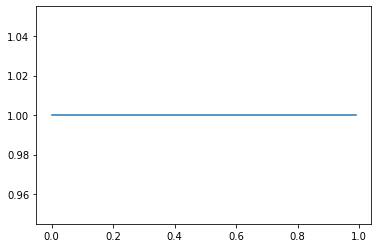

In [ ]:
_ = plt.plot(np.mgrid[0:1:0.01], beta(1, 1).pdf(np.mgrid[0:1:0.01]))

...and I observed $X = 1$, I shift the density to the right: $\pi \mid X = 1 \sim \text{Beta}(2, 1)$...

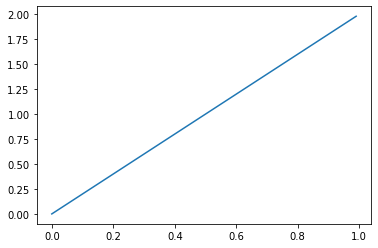

In [ ]:
_ = plt.plot(np.mgrid[0:1:0.01], beta(2, 1).pdf(np.mgrid[0:1:0.01]))

...but I observed $X = 0$, I shift the density to the left: $\pi \mid X = 0 \sim \text{Beta}(1, 2)$.

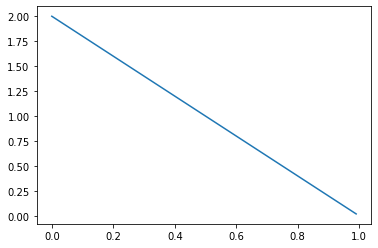

In [ ]:
_ = plt.plot(np.mgrid[0:1:0.01], beta(1, 2).pdf(np.mgrid[0:1:0.01]))

If I start out with a much denser prior, like $\pi \sim \text{Beta}(10, 10)$...

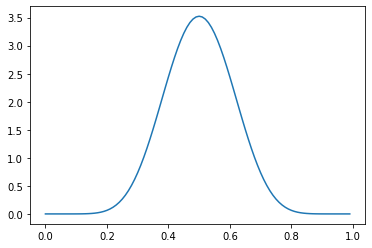

In [ ]:
_ = plt.plot(np.mgrid[0:1:0.01], beta(10, 10).pdf(np.mgrid[0:1:0.01]))

... the shifts to $\pi \mid X = 1 \sim \text{Beta}(11, 10)$ and $\pi \mid X = 0 \sim \text{Beta}(10, 11)$ are much smaller.

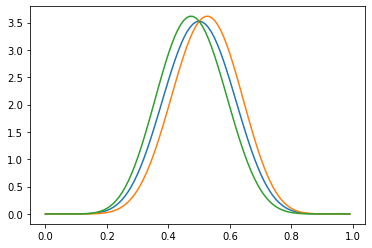

In [ ]:
_ = plt.plot(np.mgrid[0:1:0.01], beta(10, 10).pdf(np.mgrid[0:1:0.01]))
_ = plt.plot(np.mgrid[0:1:0.01], beta(11, 10).pdf(np.mgrid[0:1:0.01]))
_ = plt.plot(np.mgrid[0:1:0.01], beta(10, 11).pdf(np.mgrid[0:1:0.01]))

So the stronger I believe something initially (e.g. that there is high density nearest to $0.5$), the less I can be swayed one way or another by a single piece of evidence.

We'll use conjugacy extensively throughout this course. To give you a taste: one important place it will show up is in the context of making predictions about what we will see in the future ($x_\text{new}$) based on what we've already seen ($\mathbf{x}_\text{old}$), which we can formulate using what's know as the *posterior predictive distribution*.

$$\begin{align*}p(x_\text{new} \mid \mathbf{x}_\text{old}) &= \int p(x_\text{new}, \pi \mid \mathbf{x}_\text{old})\,\mathrm{d}\pi & \text{definition of joint distribution}\\ &= \int p(x_\text{new}\mid \pi; \mathbf{x}_\text{old})p(\pi \mid \mathbf{x}_\text{old})\,\mathrm{d}\pi & \text{definition of conditional probability}\\ &= \int p(x_\text{new}\mid \pi)p(\pi \mid \mathbf{x}_\text{old})\,\mathrm{d}\pi & \text{conditional independence assumption}\\ &= \int \mathcal{L}(\pi \mid x_\text{new})p(\pi \mid \mathbf{x}_\text{old})\,\mathrm{d}\pi  & \text{definition of $\mathcal{L}$}\\ &= \mathbb{E}\left[\mathcal{L}(\Pi \mid x_\text{new})\mid \mathbf{X}\right] & \text{definition of conditional expectation}\\\end{align*}$$

In the context of our running example, this can be read "if I've observed vowels with heights $\mathbf{x}_\text{old}$, the probability that the next vowel I observe $x_\text{new}$ will be high can be found by taking the conditional expectation of the likelihood $\mathcal{L}(\Pi \mid x_\text{new})$ (a function of the random variable $\Pi$) given $\mathbf{X}_\text{old}$."

We know by slightly extending what we saw above that:

$$p(\pi \mid \mathbf{x}; \alpha, \beta) = \text{Beta}\left(\pi; \alpha + \sum_i x_{\text{old}, i}, \beta + \sum_i 1 - x_{\text{old}, i}\right)$$

And since $p(x_\text{new}\mid \pi) = \text{Bernoulli}(x_\text{new}; \pi)$ by the work we did to prove the beta-Bernoulli conjugacy, we know that:

$$p(x_\text{new}\mid \pi; \mathbf{x}_\text{old})p(\pi \mid \mathbf{x}_\text{old}) = \frac{\pi^{\alpha + x_\text{new} + \sum_i x_{\text{old}, i} - 1}(1-\pi)^{\beta + (1-x_\text{new}) +\sum_i 1 - x_{\text{old}, i}-1}}{\mathrm{B}\left(\alpha + \sum_i x_{\text{old}, i}, \beta  +\sum_i 1 - x_{\text{old}, i}\right)}$$

So:

$$\begin{align*}p(x_\text{new} \mid \mathbf{x}_\text{old}) &= \int \frac{\pi^{\alpha + x_\text{new} + \sum_i x_{\text{old}, i} - 1}(1-\pi)^{\beta + (1-x_\text{new}) +\sum_i 1 - x_{\text{old}, i}-1}}{\mathrm{B}\left(\alpha + \sum_i x_{\text{old}, i}, \beta  +\sum_i 1 - x_{\text{old}, i}\right)}\,\mathrm{d}\pi\\ &= \frac{\int \pi^{\alpha + x_\text{new} + \sum_i x_{\text{old}, i} - 1}(1-\pi)^{\beta + (1-x_\text{new}) +\sum_i 1 - x_{\text{old}, i}-1} \,\mathrm{d}\pi}{\mathrm{B}\left(\alpha + \sum_i x_{\text{old}, i}, \beta  +\sum_i 1 - x_{\text{old}, i}\right)}\\ &= \frac{\mathrm{B}\left(\alpha + x_\text{new} + \sum_i x_{\text{old}, i}, \beta + (1-x_\text{new}) +\sum_i 1 - x_{\text{old}, i}\right)}{\mathrm{B}\left(\alpha + \sum_i x_{\text{old}, i}, \beta  +\sum_i 1 - x_{\text{old}, i}\right)}\\\end{align*}$$

This form is exactly like what we had when computing the computing $p(x)$, and the same logic for reducing it can be deployed here.

$$p(x_\text{new} \mid \mathbf{x}_\text{old}) = \text{BetaBern}\left(x_\text{new}; \alpha + \sum_i x_{\text{old}, i}, \beta + \sum_i 1- x_{\text{old}, i}\right) = \text{Bern}\left(x_\text{new}; \frac{\alpha + \sum_i x_{\text{old}, i}}{\alpha + \beta + N}\right)$$

This is of course not a coincidence: the evidence $p(x) = \int p(x\mid \pi)p(\pi)\,\mathrm{d}\pi$ is always the *prior predictive distribution*, which is just like the posterior predictive distribution, but without the conditioning on prior data.

$$p(x) = \mathbb{E}\left[\mathcal{L}(\Pi \mid x)\right]$$

# Summing Up

This has been a whirlwind tour of elementary concepts in probability and statistics. I recognize that it went fast, especially if you are rusty on these concepts or haven't seen some of them at all. When we need any of them again, I'll make sure to remind you of them, but I encourage you also to return to this notebook for a more in-depth reminder of the technical machinery.